# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (25)

**11/03/2024**

# Time Series Analysis

### Series temporales sintéticas

Las series temporales sintéticas (___Synthetic time series___) son datos **creados artificialmente** que se utilizan para **simular** datos del mundo real (_real-world data_), normalmente para realizar pruebas o experimentos. Estos datos de series de tiempo se pueden generar utilizando varias técnicas estadísticas y modelos matemáticos.

- #### Trend-stationary

Un proceso estacionario de tendencia (___trend-stationary___) es un proceso estocástico del que se puede eliminar una tendencia subyacente, dejando un proceso estacionario.  

Estas series temporales muestran una **tendencia estable** a largo plazo con **fluctuaciones a corto plazo** en torno a esa tendencia. Estas variaciones se mantienen de forma similar a lo largo del tiempo, pero son impredecibles y aleatorias (_ruidos_).

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
# Definir el rango o el intervalo de tiempo
inicio = "2024-03-10 00:00:00"
fin = "2024-03-20 00:00:00"
rango_tiempo = pd.date_range(inicio, fin, freq="H")
rango_tiempo

DatetimeIndex(['2024-03-10 00:00:00', '2024-03-10 01:00:00',
               '2024-03-10 02:00:00', '2024-03-10 03:00:00',
               '2024-03-10 04:00:00', '2024-03-10 05:00:00',
               '2024-03-10 06:00:00', '2024-03-10 07:00:00',
               '2024-03-10 08:00:00', '2024-03-10 09:00:00',
               ...
               '2024-03-19 15:00:00', '2024-03-19 16:00:00',
               '2024-03-19 17:00:00', '2024-03-19 18:00:00',
               '2024-03-19 19:00:00', '2024-03-19 20:00:00',
               '2024-03-19 21:00:00', '2024-03-19 22:00:00',
               '2024-03-19 23:00:00', '2024-03-20 00:00:00'],
              dtype='datetime64[ns]', length=241, freq='H')

Definimos una variable como la secuencia de tiempo: _t_

In [4]:
t = np.arange(len(rango_tiempo))
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
# Fijamos la semilla
np.random.seed(77)

# Generamos un componente de tendencia (Trend)
tendencia = 1.25 * t

# Generamos un ruido blanco
ruido = 5 * np.random.randn(len(t))

# Combinamos la tendencia y el ruido
valores = tendencia + ruido

# Crear un DataFrame de la serie temporal con los valores y los índices
df_serie = pd.DataFrame(data=valores, index=rango_tiempo)
df_serie

,0
2024-03-10 00:00:00,1.122224
2024-03-10 01:00:00,4.557657
2024-03-10 02:00:00,-0.398788
2024-03-10 03:00:00,5.789057
2024-03-10 04:00:00,7.332397
...,...
2024-03-19 20:00:00,296.602734
2024-03-19 21:00:00,296.599028
2024-03-19 22:00:00,287.896310
2024-03-19 23:00:00,294.495519


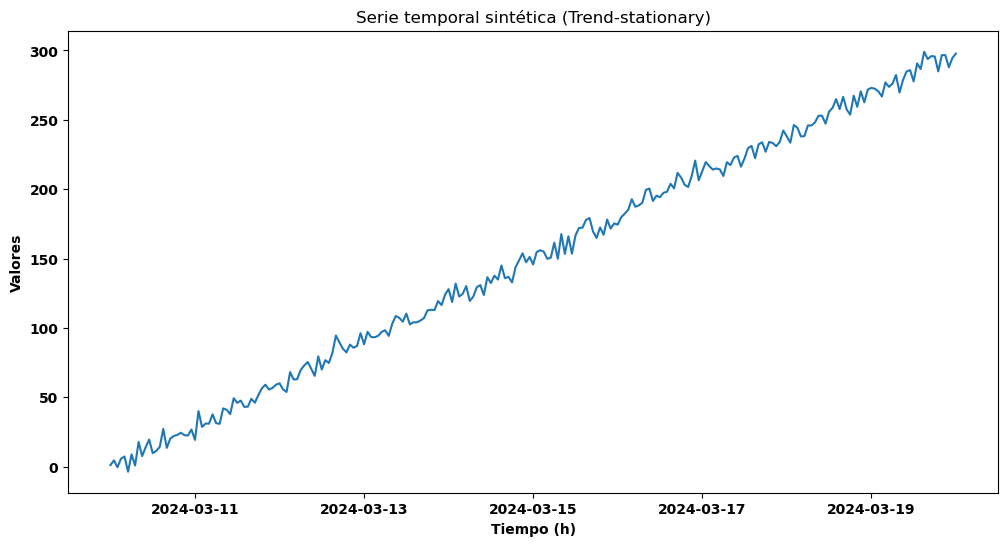

In [6]:
# Graficar la serie temporal sintética
plt.plot(df_serie) 
plt.title("Serie temporal sintética (Trend-stationary)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

Claramente esta serie temporal es una serie **no estacionaria**,  porque con el paso de tiempo su nivel va cambiando. Se ve que hay una clara regresión entre el valor actual y los valores de momentos anteriores.

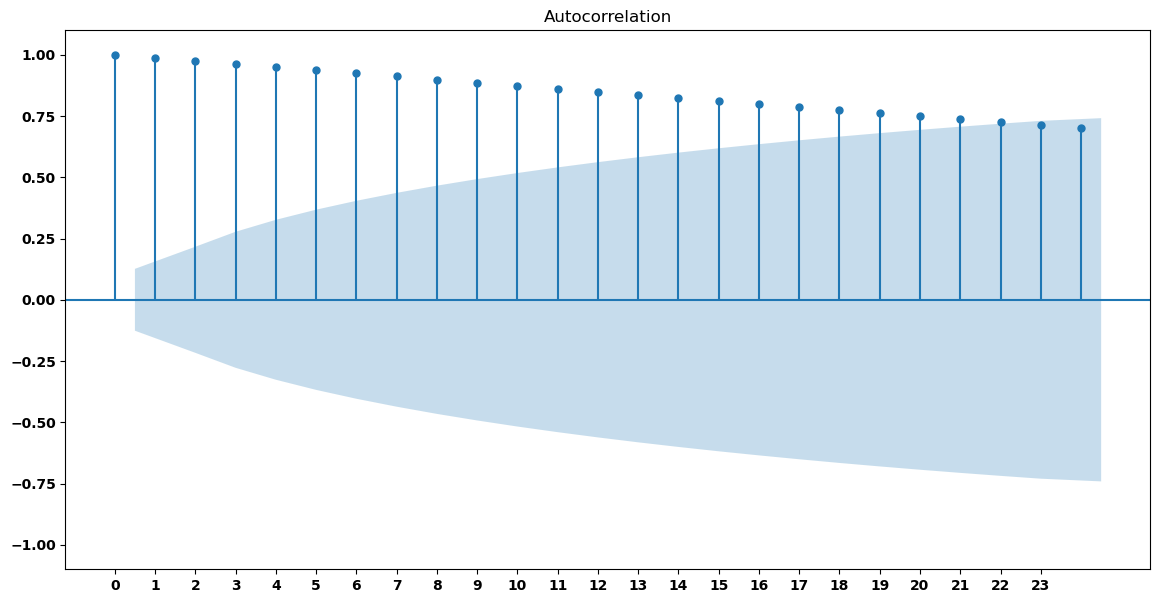

In [7]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_serie, lags=24)
plt.xticks(np.arange(24))
plt.ylim(-1.1,1.1)
plt.show()

Se puede ver que la **autocorrelación existe** en esta serie y se disminuye según calculamos los retrasos anteriores. A cambio la **autocorrelación parcial indica una regresión prácticamente lineal** entre el valor de un momento determinado y el valor del paso anterior (_lag1_)

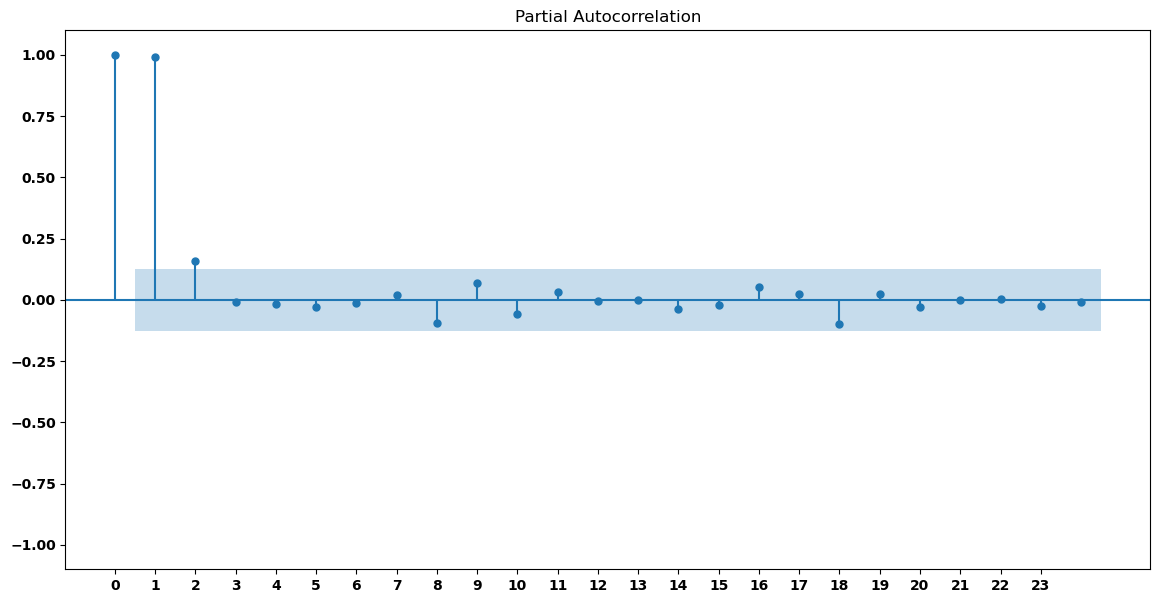

In [8]:
# Comprobamos la PACF
from statsmodels.graphics.tsaplots import plot_pacf

rcParams['figure.figsize'] = 14, 7
plot_pacf(df_serie, lags=24, method='yw')
plt.xticks(np.arange(24))
plt.ylim(-1.1,1.1)
plt.show()

Podemos estudiar la evolución de las medidas estadísticas y ver que salvo la tendencia que hace que **aumente su media**, el resto de los aspectos como la varianza o **la dispersión sigue igual** a lo largo de tiempo 

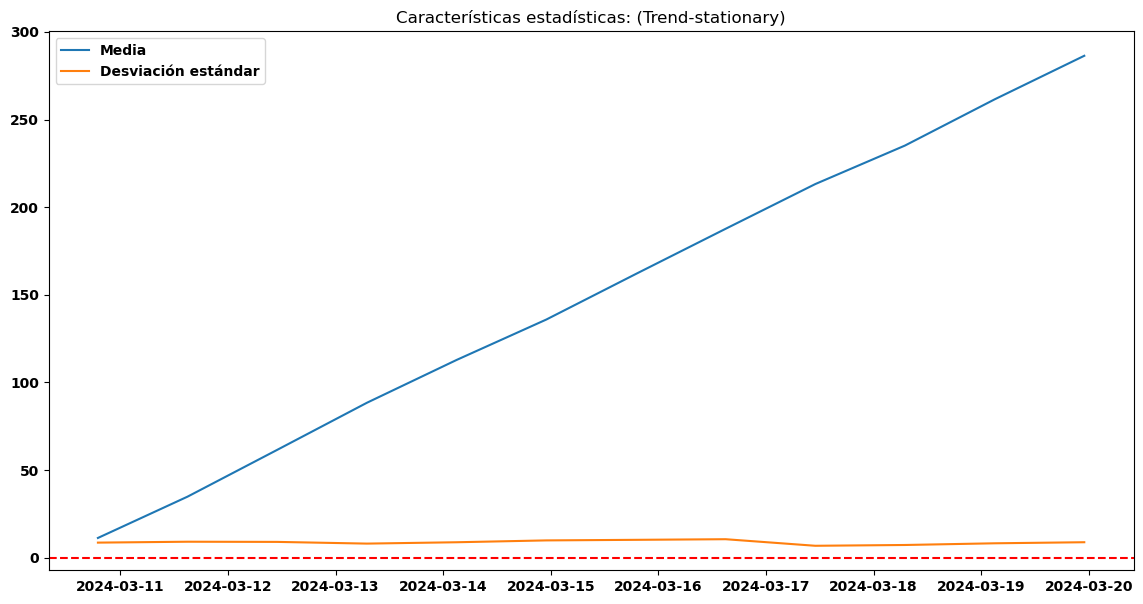

In [9]:
win = 20
df_serie_media = df_serie.rolling(win).mean().iloc[win-1::win]
df_serie_std = df_serie.rolling(win).std().iloc[win-1::win]
plt.plot(df_serie_media, label='Media')
plt.plot(df_serie_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Trend-stationary)")
plt.legend()
plt.show()

- #### Seasonal-stationary

Una serie de tipo estacionaria estacional (___seasonal-stationary___) muestra una **media estable**, una **varianza** y una estructura de **autocorrelación consistente** a lo largo del tiempo, a pesar de tener un **patrón estacional repetitivo**. En otras palabras, las propiedades estadísticas de los datos permanecen constantes a lo largo del tiempo, aunque los **valores pueden cambiar estacionalmente**.

,0
2024-03-10 00:00:00,-0.907071
2024-03-10 01:00:00,1.852540
2024-03-10 02:00:00,4.136169
2024-03-10 03:00:00,3.760779
2024-03-10 04:00:00,4.125256
...,...
2024-03-19 20:00:00,-5.929027
2024-03-19 21:00:00,-5.267474
2024-03-19 22:00:00,-2.287528
2024-03-19 23:00:00,-0.090846


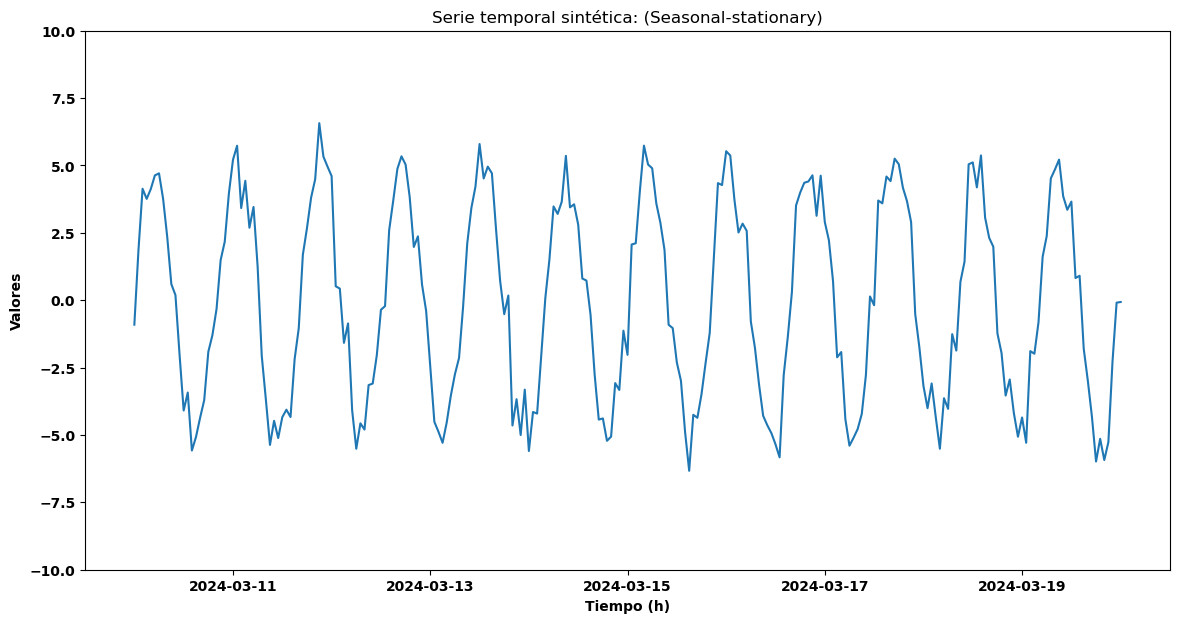

In [10]:
# Fijar la semilla
np.random.seed(111)

# Indicar la frecuencia (de una señal armónica commo el seno)
frecuencia = 12

# Crear las secuencias del eje de tiempo
t = np.linspace(0,1, len(rango_tiempo))

# Generar el seno
seno = 5*np.sin(2*np.pi*frecuencia*t)

# Generar un ruido blanco
ruido_normal = np.random.normal(loc=0, scale=0.8, size=len(rango_tiempo))

# Añadir el ruido
valores2 = seno + ruido_normal

# Crear un DataFrame de la serie temporal con los valores y los índices
df_serie2 = pd.DataFrame(data=valores2, index=rango_tiempo)
display(df_serie2)

# Graficar la serie temporal sintética
plt.plot(df_serie2) 
plt.ylim(-10,10)
plt.title("Serie temporal sintética: (Seasonal-stationary)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

In [11]:
# Sacar la gráfica interactiva
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_serie2.index,
    y=df_serie2.iloc[:,0],
    mode="markers+lines",
    ))

fig.show()

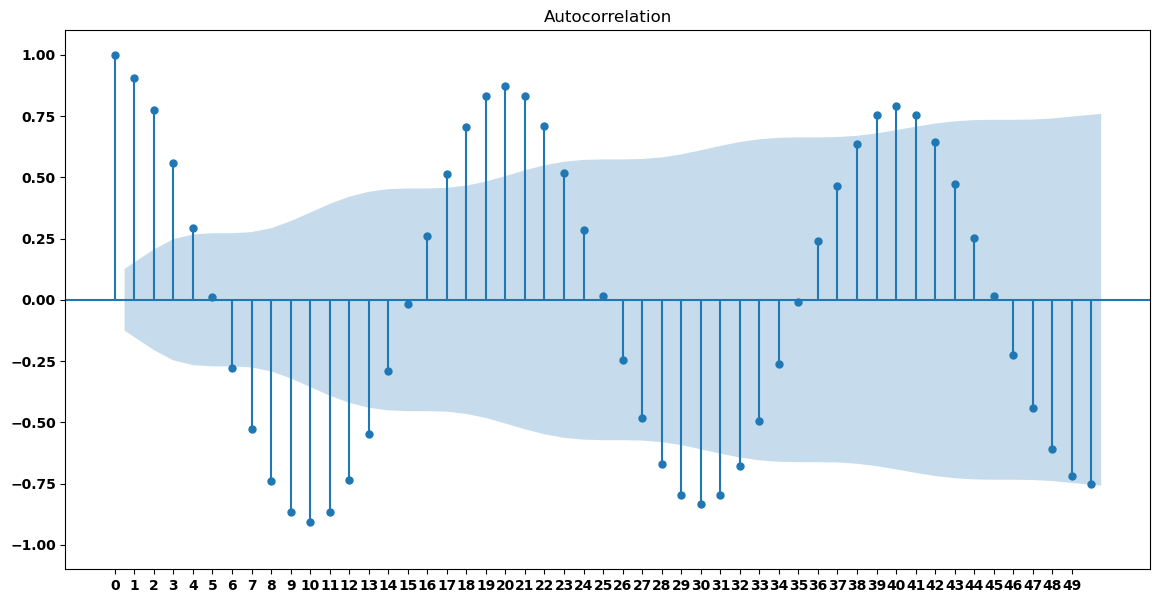

In [12]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_serie2, lags=50)
plt.xticks(np.arange(50))
plt.ylim(-1.1,1.1)
plt.show()

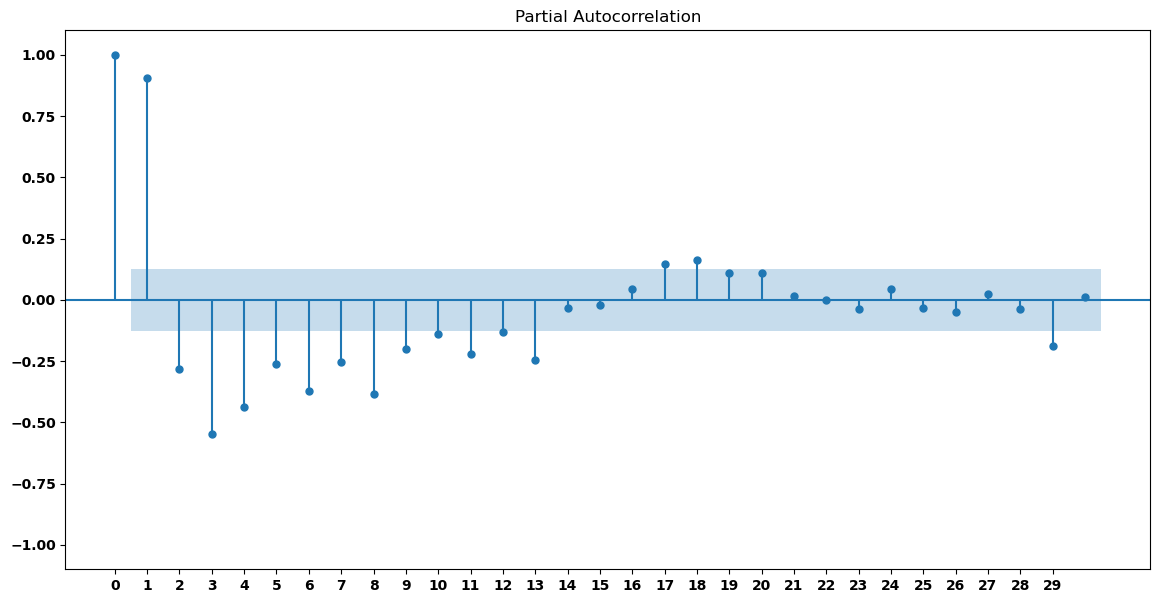

In [13]:
# Comprobamos la PACF
from statsmodels.graphics.tsaplots import plot_pacf

rcParams['figure.figsize'] = 14, 7
plot_pacf(df_serie2, lags=30, method='ols')
plt.xticks(np.arange(30))
plt.ylim(-1.1,1.1)
plt.show()

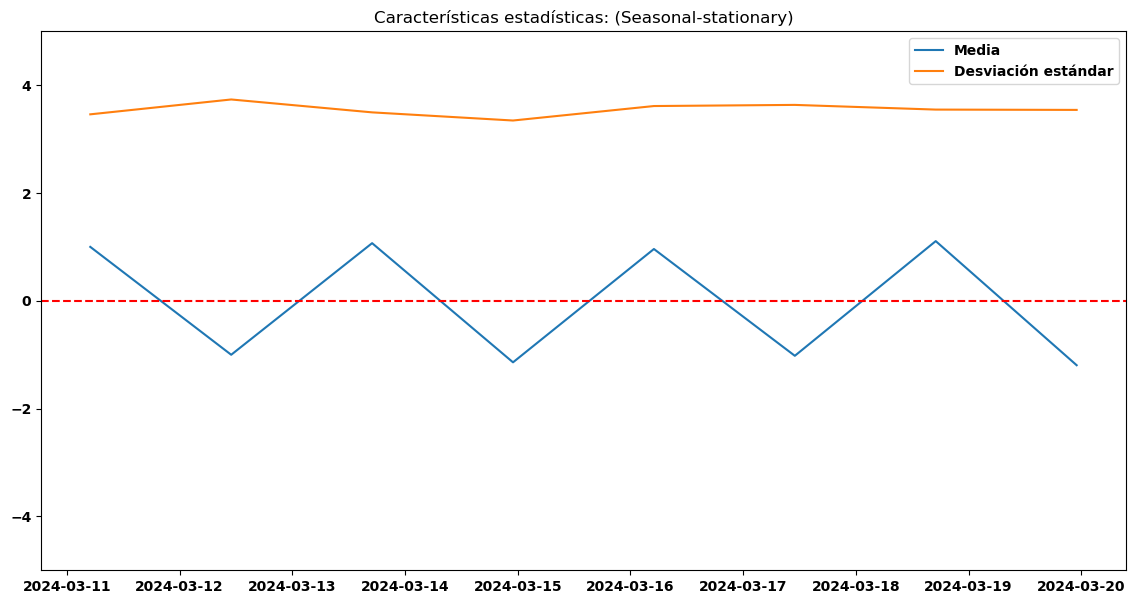

In [14]:
win = 30
df_serie2_media = df_serie2.rolling(win).mean().iloc[win-1::win]
df_serie2_std = df_serie2.rolling(win).std().iloc[win-1::win]
plt.plot(df_serie2_media, label='Media')
plt.plot(df_serie2_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Seasonal-stationary)")
plt.ylim(-5,5)
plt.legend()
plt.show()

### Non-Stationary Time Series

#### Chirp signal

Una señal ___chirp___ es un tipo de serie temporal en la que **la frecuencia varía con el tiempo**. Las señales chirp se utilizan ampliamente en varios campos, incluidos el **radar**, el sonar, los sistemas de **comunicación** y las **imágenes biomédicas**.

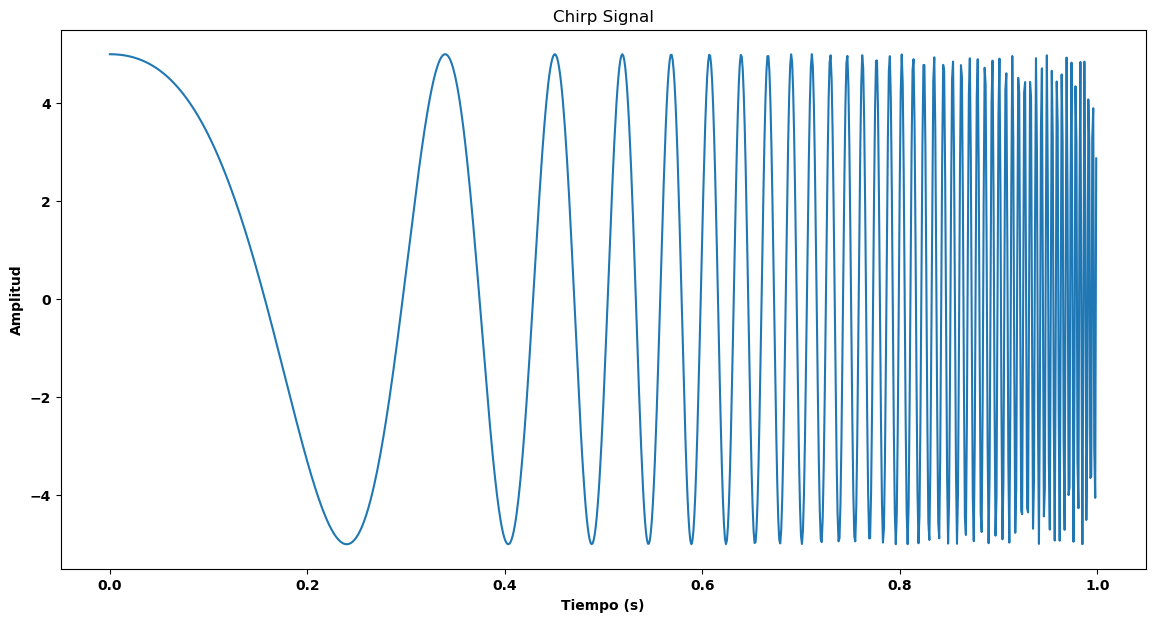

In [15]:
from scipy import signal

# Establecer los parámetros de la señal
f0 = 1  # frecuencia inicial
f1 = 250  # frecuencia final
T = 1  # Duración de la señal (segundos)

# Generar el "chirp signal"
t = np.linspace(0, T, int(T * 1000), endpoint=False)
amplitud = 5*signal.chirp(t, f0=f0, f1=f1, t1=T, method='logarithmic')
df_chirp = pd.DataFrame(data=amplitud, index=t)

# Graficar la señal
plt.plot(df_chirp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Chirp Signal')
plt.show()

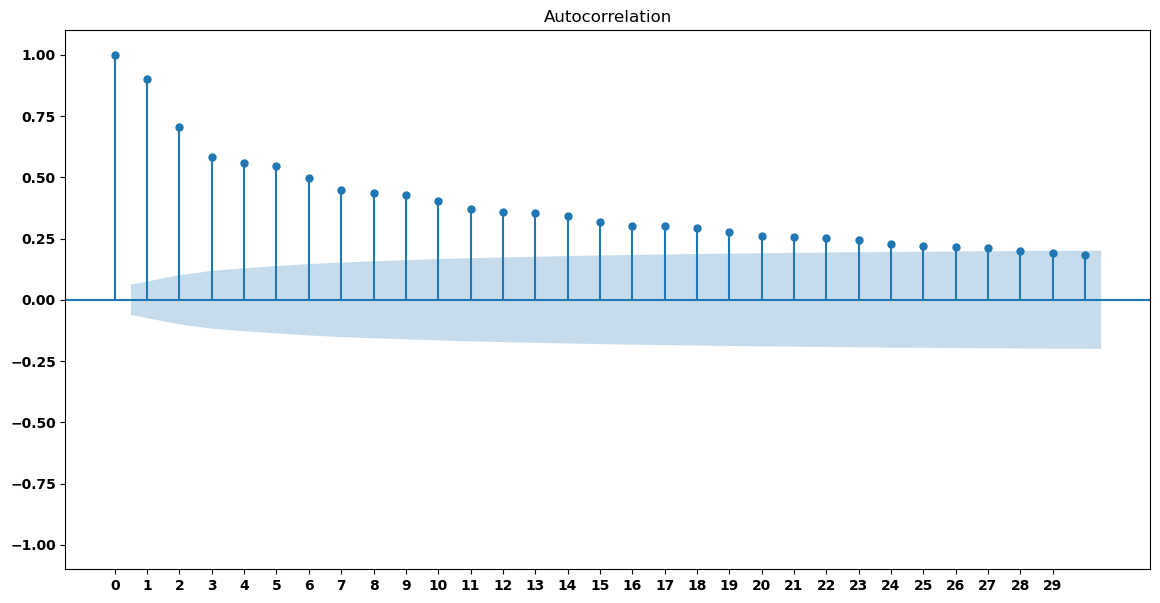

In [16]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_chirp, lags=30)
plt.xticks(np.arange(30))
plt.ylim(-1.1,1.1)
plt.show()

Como es de esperar, esta señal muestra variaciones en sus propiedades estadísticas, y por lo tanto es **un ejemplo de la no estacionariedad**.

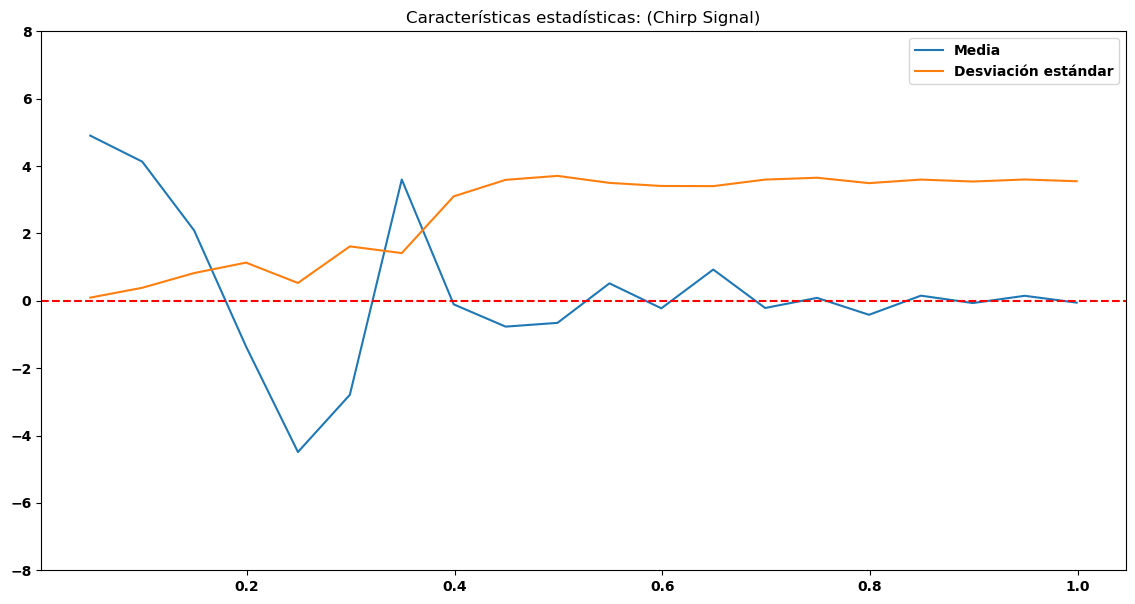

In [17]:
win = 50
df_chirp_media = df_chirp.rolling(win).mean().iloc[win-1::win]
df_chirp_std = df_chirp.rolling(win).std().iloc[win-1::win]
plt.plot(df_chirp_media, label='Media')
plt.plot(df_chirp_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Chirp Signal)")
plt.ylim(-8,8)
plt.legend()
plt.show()

Los datos no estacionarios pueden presentar por ejemplo **cambios en la dispersión** o en la varianza de sus valores. 

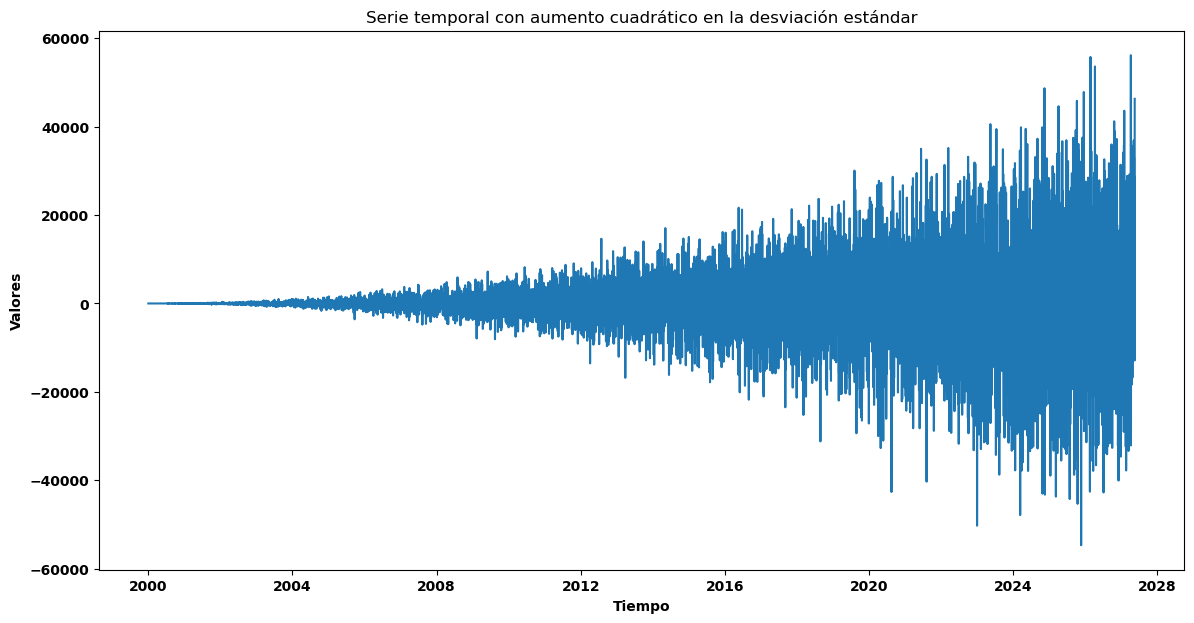

In [18]:
# Fijar la semilla
np.random.seed(333)

# Determinar el número de observaciones
n = 10000

# Introducir la desviación estándar inicial y el incremento que se le realiza en cada paso
std_inicial = 1.0
std_incremento = 0.0002

# Generar los índices
start_date = pd.Timestamp('2000-01-01')
indices = pd.date_range(start_date, periods=n, freq='D')

# Crear el DataFrame
datos = np.zeros(n)
for i in range(1, n):
    # Incrementos cuadráticos de la desviación estándar de los valores de la serie
    desv_estandar = std_inicial + std_incremento * (i+1)**2
    datos[i] = np.random.normal(loc=0, scale=desv_estandar)
df_std_creciente = pd.DataFrame(datos, index=indices)

# Graficar la serie sintética
plt.plot(df_std_creciente)
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Serie temporal con aumento cuadrático en la desviación estándar')
plt.show()


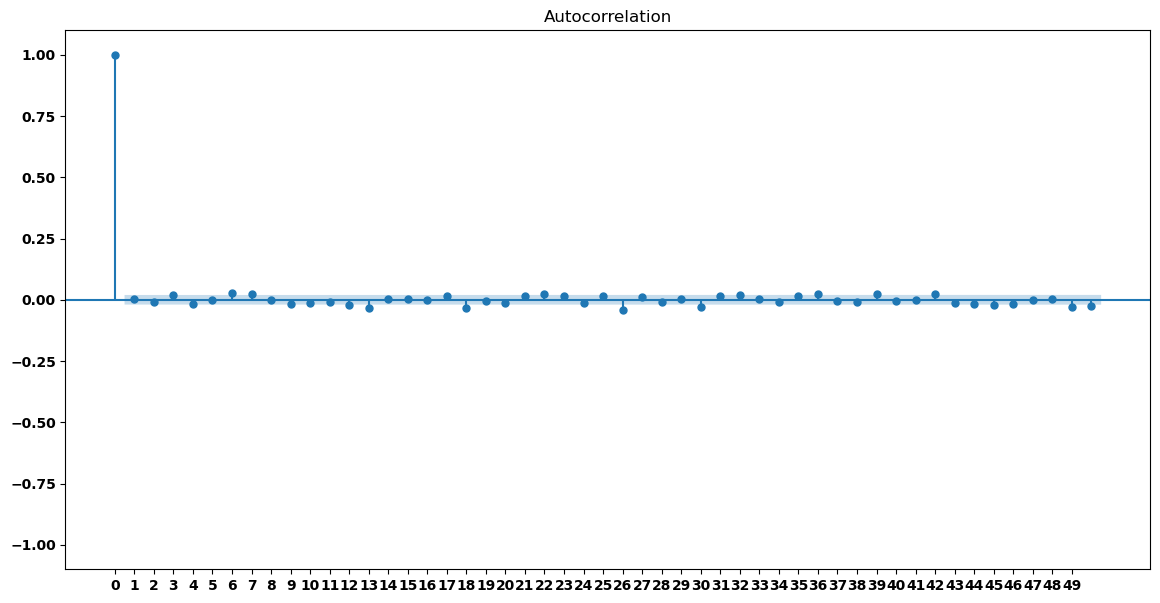

In [19]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_std_creciente, lags=50)
plt.xticks(np.arange(50))
plt.ylim(-1.1,1.1)
plt.show()

Como se aprecia en esta caso, **el hecho de no tener una autocorrelación presente** en los valores de una serie temporal, **no necesariamente indica que el proceso sea estacionaro**!

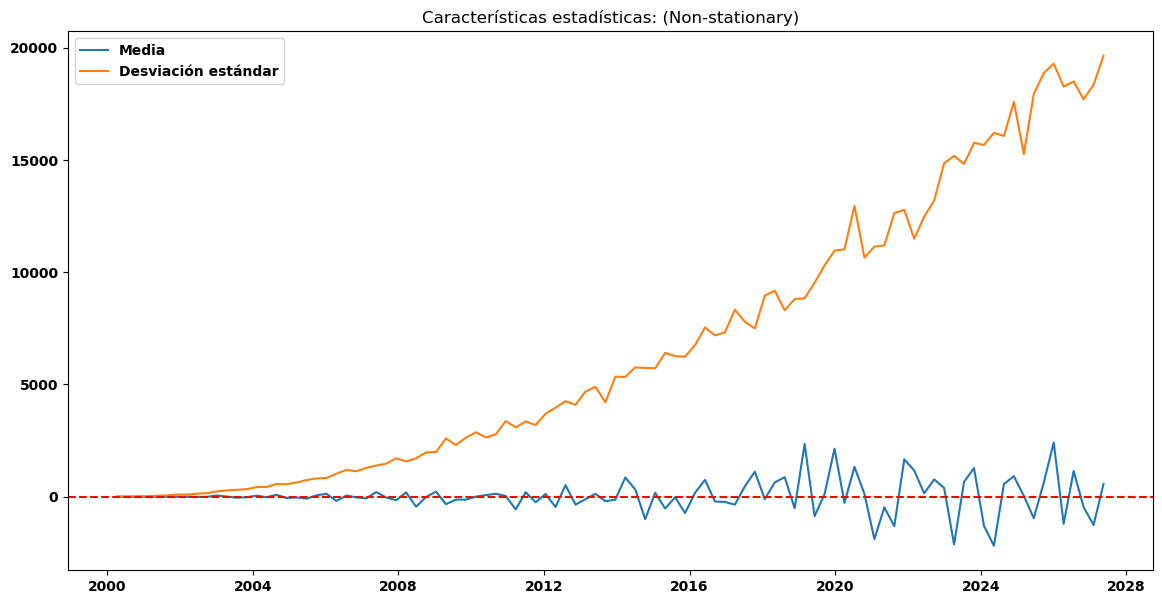

In [20]:
win = 100
df_std_creciente_media = df_std_creciente.rolling(win).mean().iloc[win-1::win]
df_std_creciente_std = df_std_creciente.rolling(win).std().iloc[win-1::win]
plt.plot(df_std_creciente_media, label='Media')
plt.plot(df_std_creciente_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Non-stationary)")
plt.legend()
plt.show()

### Differencing 

La **diferenciación** (_Differencing_) es un método para **transformar** un conjunto de datos de series temporales. Se puede usar para **eliminar la dependencia temporal** de la serie. Esto incluye estructuras como **tendencias** y **estacionalidad**.  

La diferenciación de **primer grado** de una serie temporal se define como la **diferencia entre observaciones consecutivas**.

Transformamos la serie temporal sintética que era estacionaria de tendencia (_trend-stationary_) aplicando una diferenciación del primer orden:

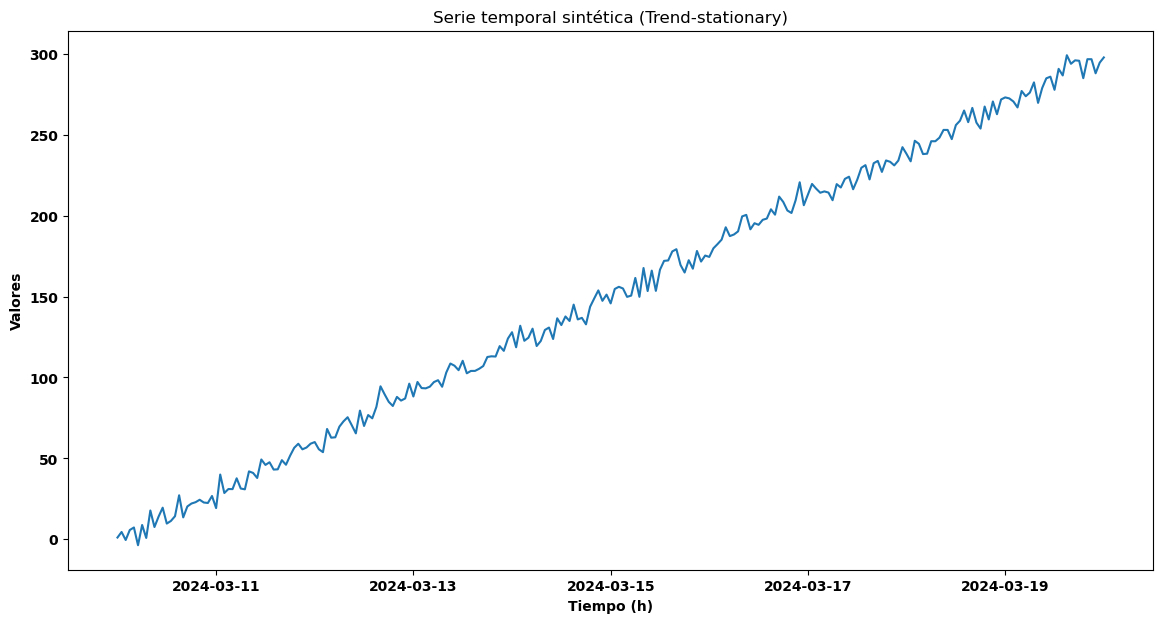

In [21]:
# Graficar la serie temporal sintética
plt.plot(df_serie) 
plt.title("Serie temporal sintética (Trend-stationary)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

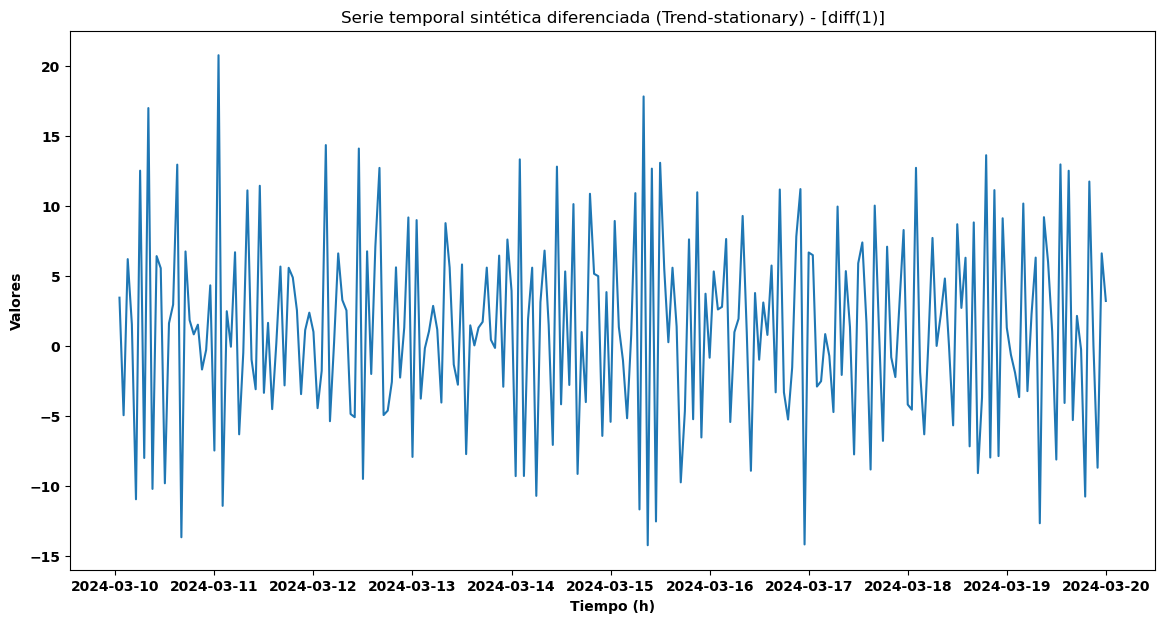

In [22]:
# Graficar la serie temporal sintética diferenciada
plt.plot(df_serie.diff()) 
plt.title("Serie temporal sintética diferenciada (Trend-stationary) - [diff(1)]")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

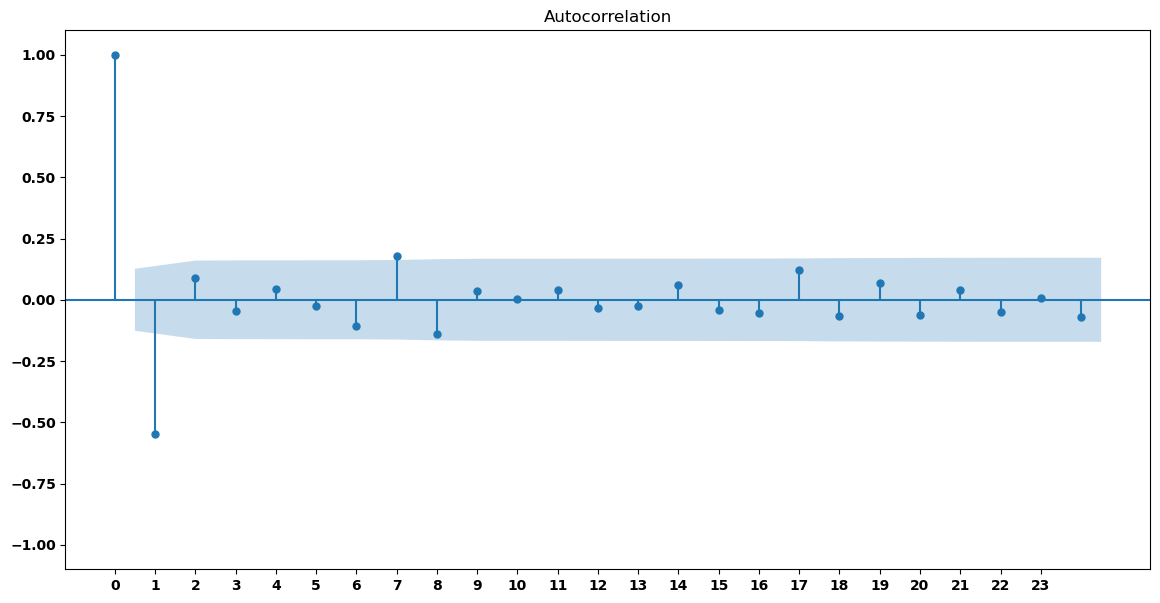

In [23]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_serie.diff().dropna(), lags=24)
plt.xticks(np.arange(24))
plt.ylim(-1.1,1.1)
plt.show()

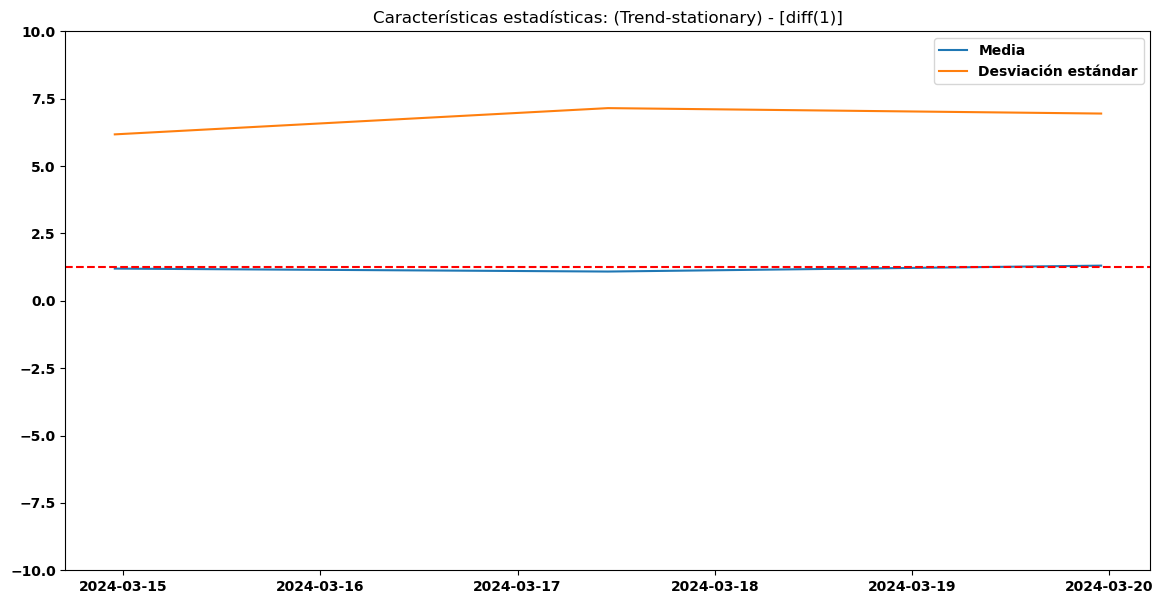

In [24]:
win = 60
df_serie_media_diff = df_serie.diff().rolling(win).mean().iloc[win-1::win]
df_serie_std_diff = df_serie.diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_serie_media_diff, label='Media')
plt.plot(df_serie_std_diff, label='Desviación estándar')
plt.axhline(y=1.25, color='r', linestyle='--')
plt.ylim(-10,10)
plt.title("Características estadísticas: (Trend-stationary) - [diff(1)]")
plt.legend()
plt.show()

Se puede observar que tras la diferenciación se estabilizan las medidas estadísticas.

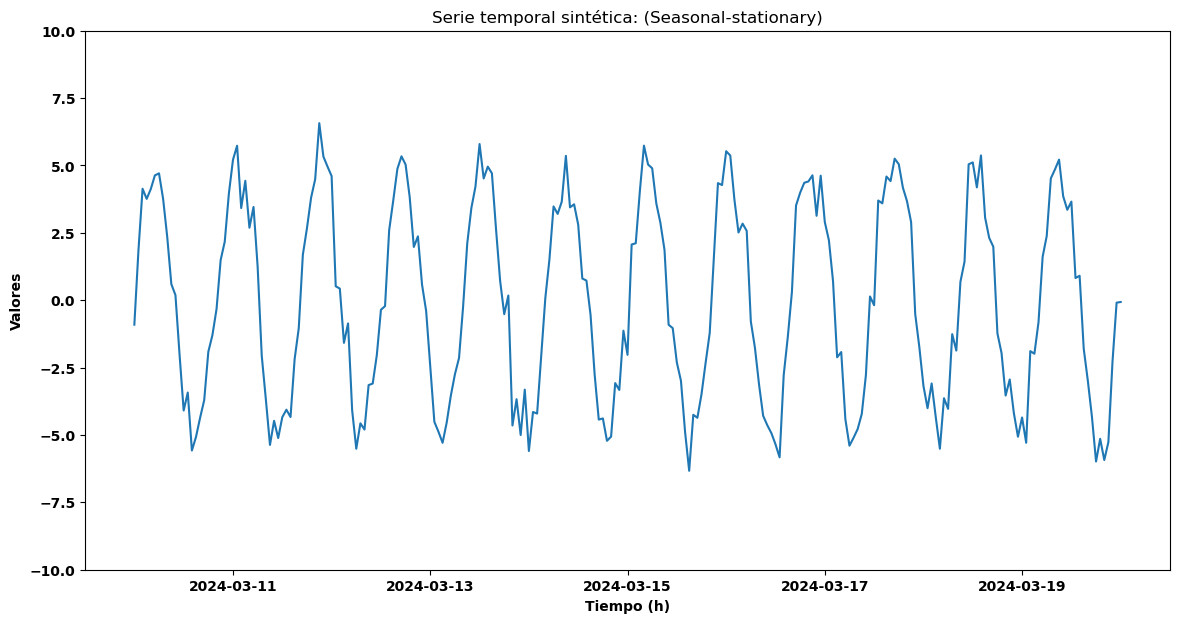

In [25]:
# Graficamos la serie temporal sintética
plt.plot(df_serie2) 
plt.ylim(-10,10)
plt.title("Serie temporal sintética: (Seasonal-stationary)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

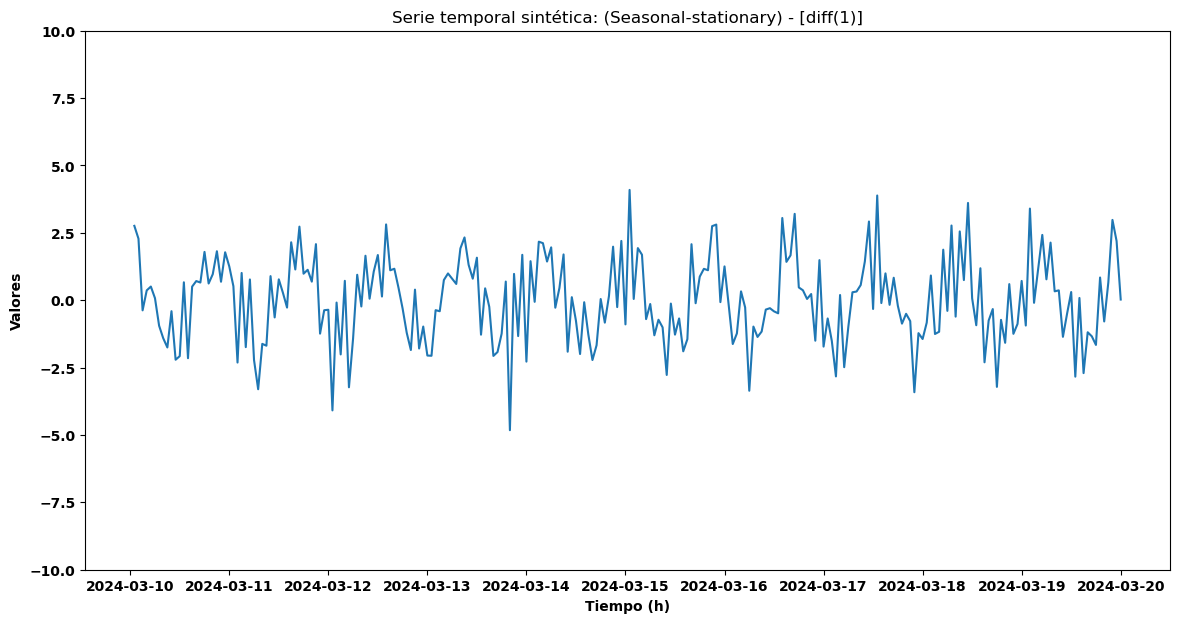

In [26]:
# Graficamos la serie temporal sintética
plt.plot(df_serie2.diff()) 
plt.ylim(-10,10)
plt.title("Serie temporal sintética: (Seasonal-stationary) - [diff(1)]")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

In [27]:
df_serie2

,0
2024-03-10 00:00:00,-0.907071
2024-03-10 01:00:00,1.852540
2024-03-10 02:00:00,4.136169
2024-03-10 03:00:00,3.760779
2024-03-10 04:00:00,4.125256
...,...
2024-03-19 20:00:00,-5.929027
2024-03-19 21:00:00,-5.267474
2024-03-19 22:00:00,-2.287528
2024-03-19 23:00:00,-0.090846


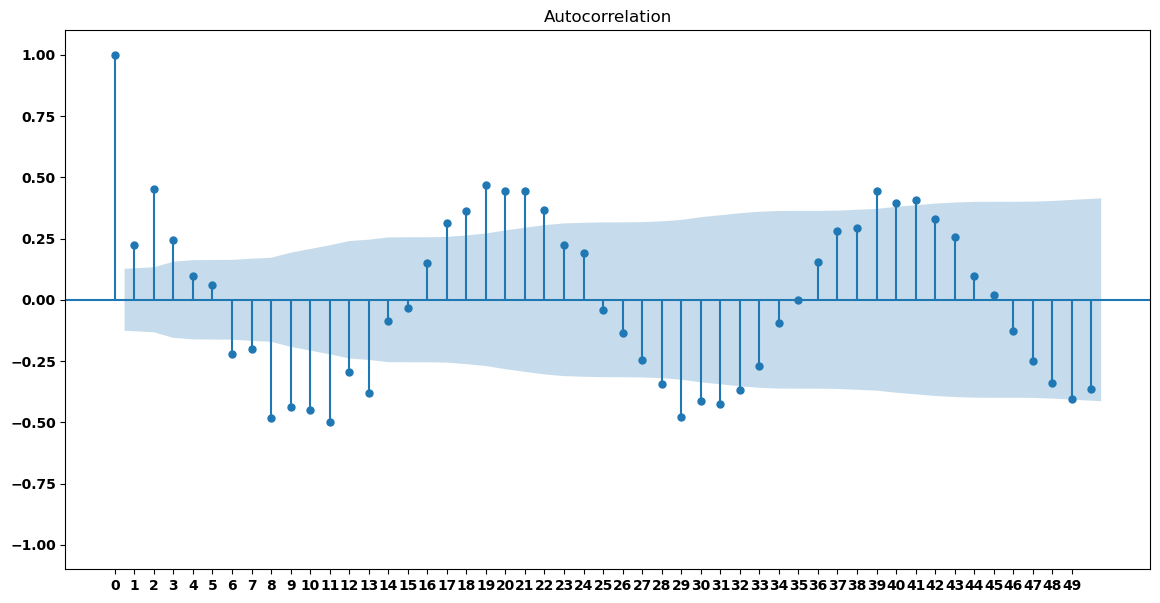

In [28]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_serie2.diff().dropna(), lags=50)
plt.xticks(np.arange(50))
plt.ylim(-1.1,1.1)
plt.show()

Podemos comprobar que la serie temporal diferenciada **todavía muestra cambios en sus propiedades** en el eje de tiempo, como un **patrón estacional** y **autocorrelación**. Por lo tanto procedemos con la diferenciación del segundo orden.

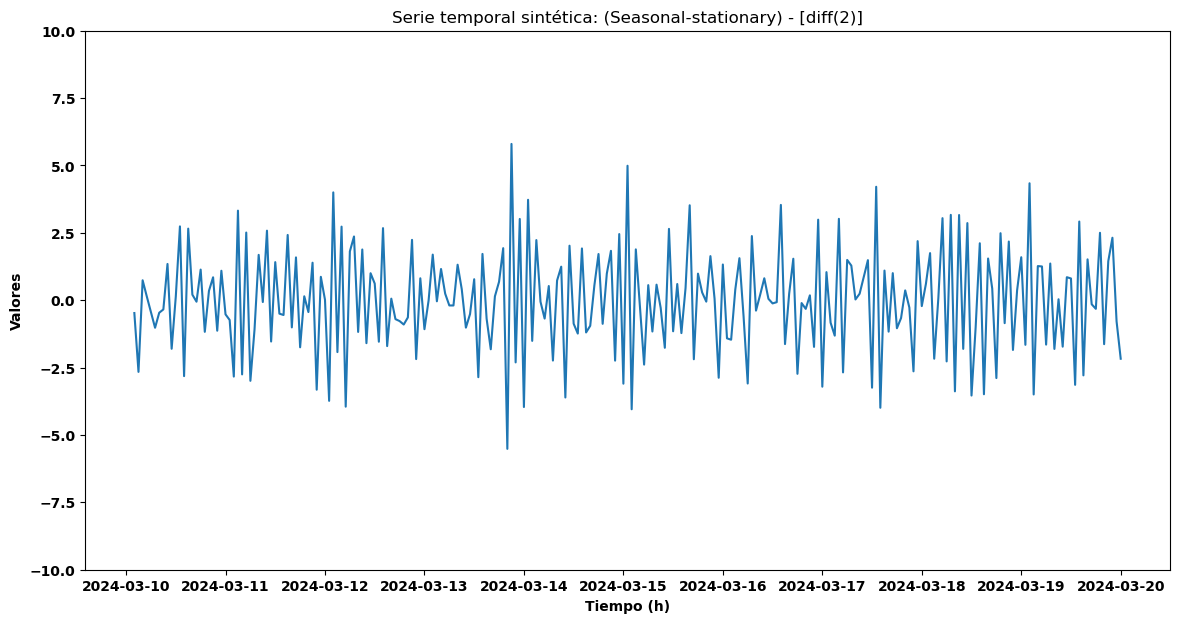

In [29]:
# Graficamos la serie temporal sintética
plt.plot(df_serie2.diff().diff()) 
plt.ylim(-10,10)
plt.title("Serie temporal sintética: (Seasonal-stationary) - [diff(2)]")
plt.xlabel("Tiempo (h)")
plt.ylabel("Valores")
plt.show()

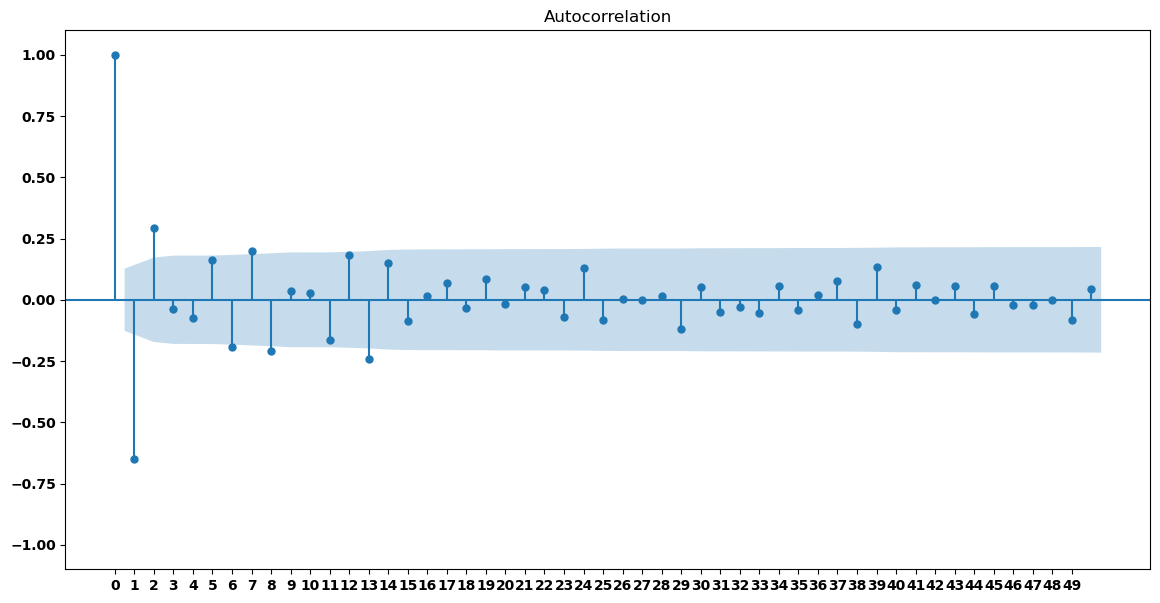

In [30]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_serie2.diff().diff().dropna(), lags=50)
plt.xticks(np.arange(50))
plt.ylim(-1.1,1.1)
plt.show()

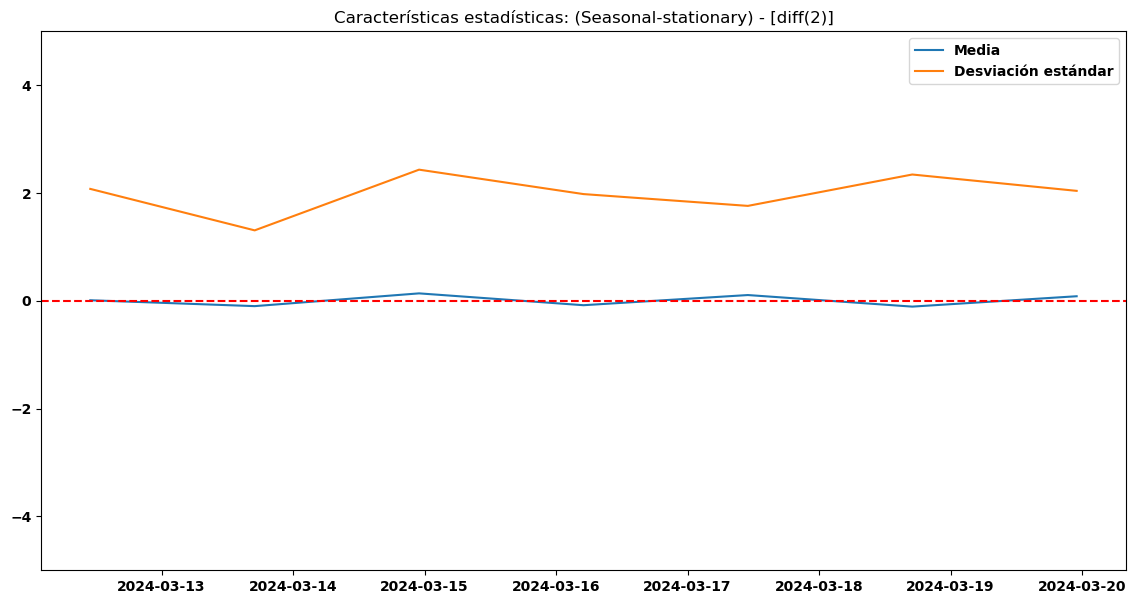

In [31]:
win = 30
df_serie2_media_diff2 = df_serie2.diff().diff().rolling(win).mean().iloc[win-1::win]
df_serie2_std_diff2 = df_serie2.diff().diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_serie2_media_diff2, label='Media')
plt.plot(df_serie2_std_diff2, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Seasonal-stationary) - [diff(2)]")
plt.ylim(-5,5)
plt.legend()
plt.show()

En este caso se puede apreciar que al realizar dos veces la diferenciación se consigue una señal estacionaria. 

Ahora volvemos al caso de "_chirp signal_" que también era un ejemplo de una serie no estacionaria: 

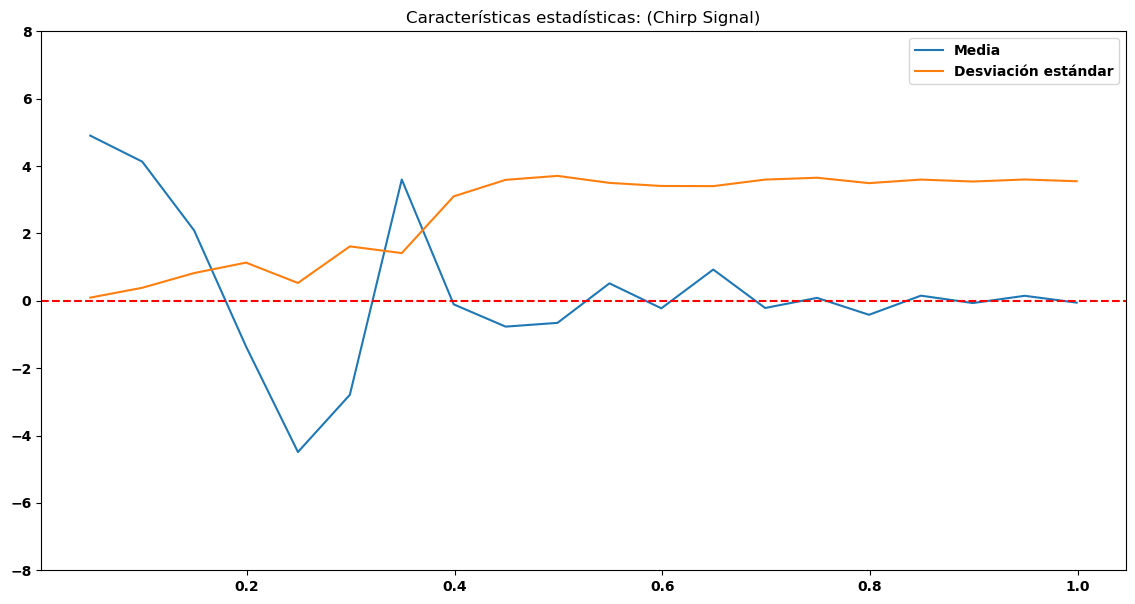

In [32]:
win = 50
df_chirp_media = df_chirp.rolling(win).mean().iloc[win-1::win]
df_chirp_std = df_chirp.rolling(win).std().iloc[win-1::win]
plt.plot(df_chirp_media, label='Media')
plt.plot(df_chirp_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Chirp Signal)")
plt.ylim(-8,8)
plt.legend()
plt.show()

Realizamos la diferenciación del primer orden:

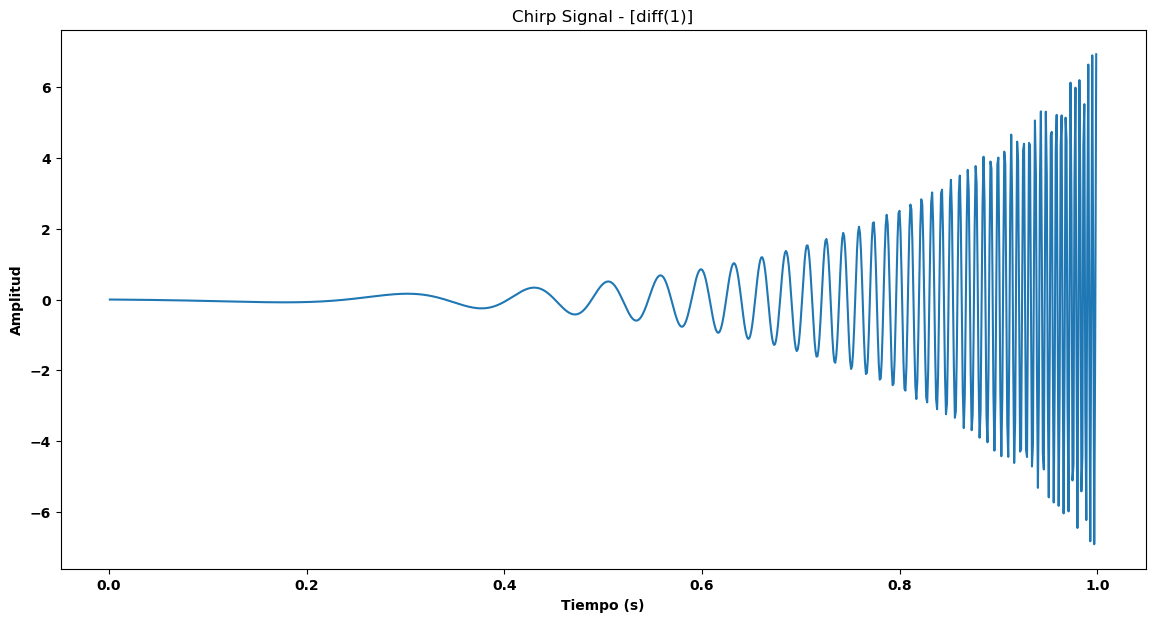

In [33]:
# Graficar la señal diferenciada
plt.plot(df_chirp.diff())
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Chirp Signal - [diff(1)]')
plt.show()

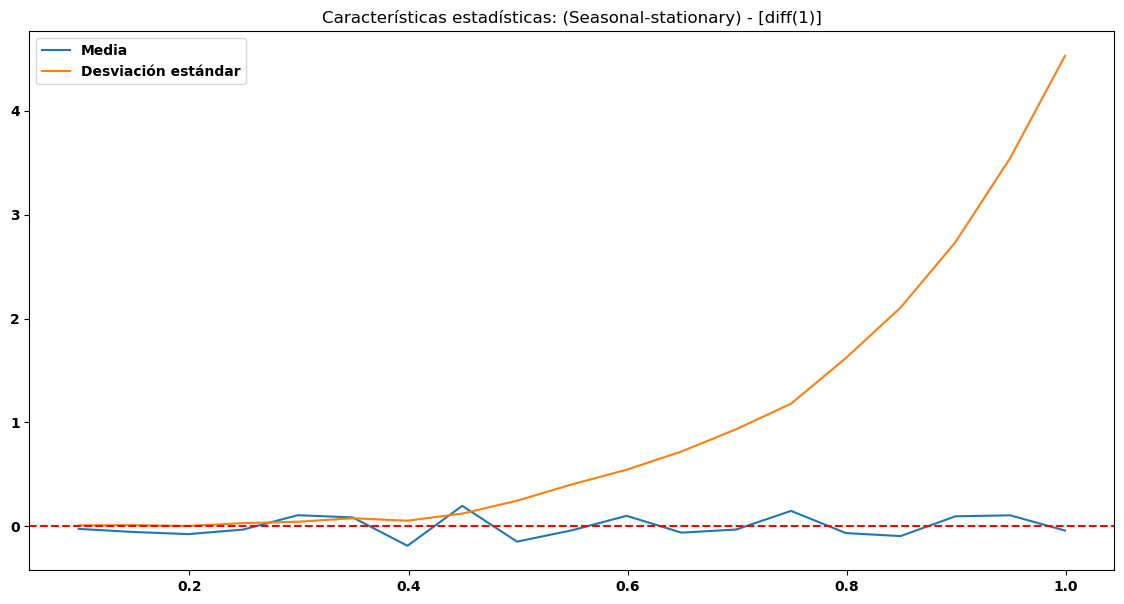

In [34]:
win = 50
df_chirp_media_diff = df_chirp.diff().rolling(win).mean().iloc[win-1::win]
df_chirp_std_diff = df_chirp.diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_chirp_media_diff, label='Media')
plt.plot(df_chirp_std_diff, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Seasonal-stationary) - [diff(1)]")
plt.legend()
plt.show()

Se puede confirmar que en este caso la diferenciación **elimina las oscilaciones del nivel de la serie**, sin embargo, **no consigue estabilizar la varianza** de los datos. Procedemos a diferenciar aún más la serie:

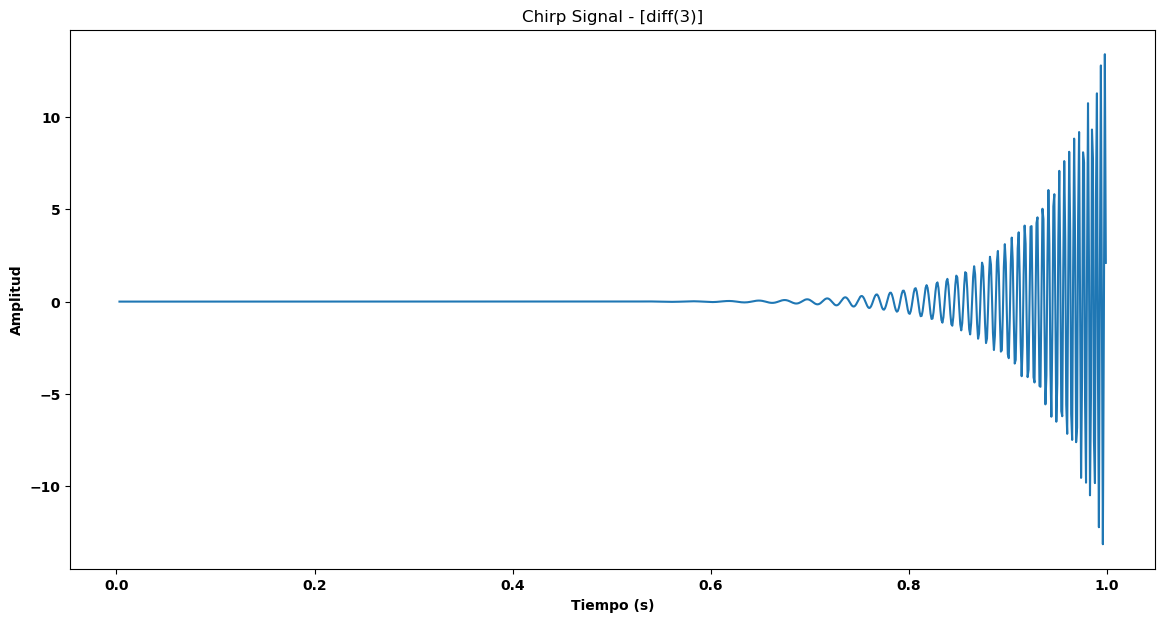

In [35]:
# Graficar la señal diferenciada
plt.plot(df_chirp.diff().diff().diff())
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Chirp Signal - [diff(3)]')
plt.show()

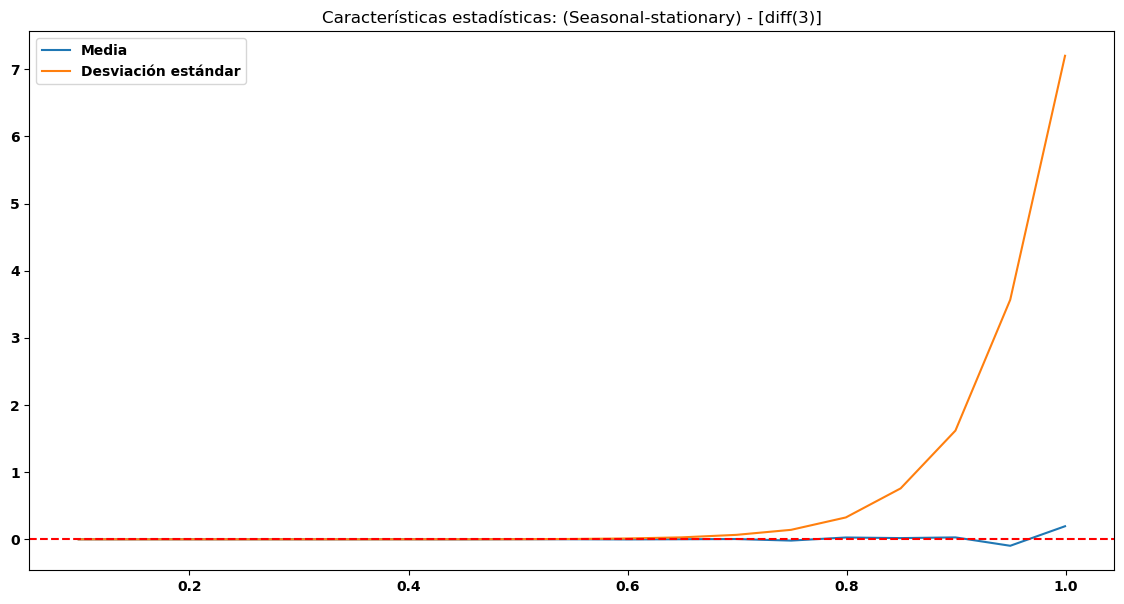

In [36]:
win = 50
df_chirp_media_diff = df_chirp.diff().diff().diff().rolling(win).mean().iloc[win-1::win]
df_chirp_std_diff = df_chirp.diff().diff().diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_chirp_media_diff, label='Media')
plt.plot(df_chirp_std_diff, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Seasonal-stationary) - [diff(3)]")
plt.legend()
plt.show()

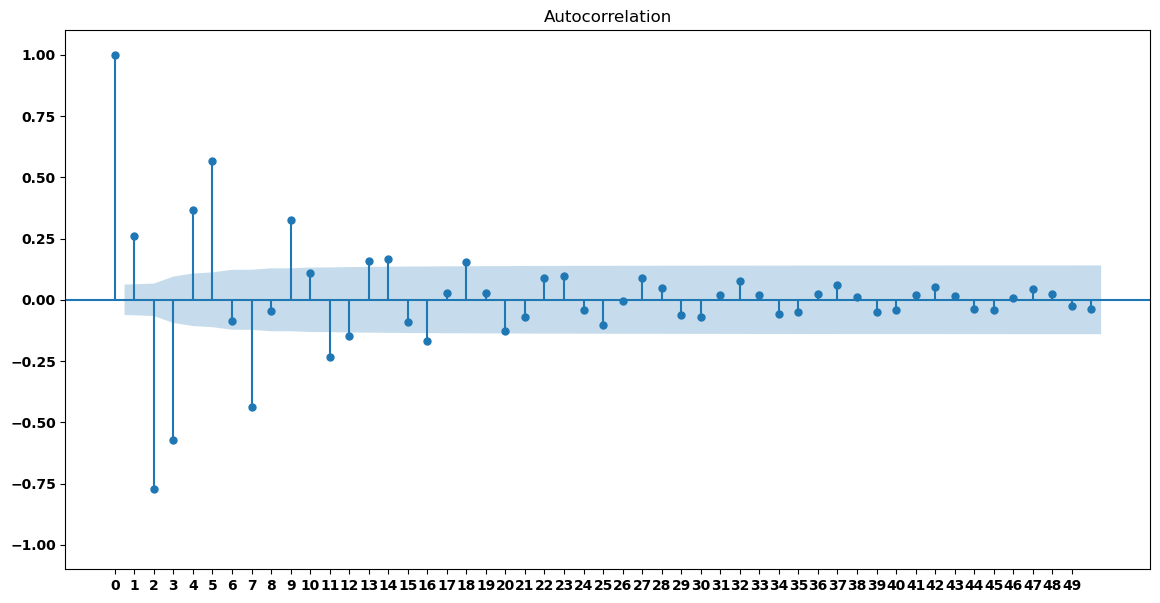

In [37]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_chirp.diff().diff().diff().dropna(), lags=50)
plt.xticks(np.arange(50))
plt.ylim(-1.1,1.1)
plt.show()

Se puede observar que en este caso, la diferenciación de ordenes mayores tampoco consigue convertir la serie en una serie temporal estacionaria.


Vamos a analizar el caso de la serie temporal con la **varianza creciente**:

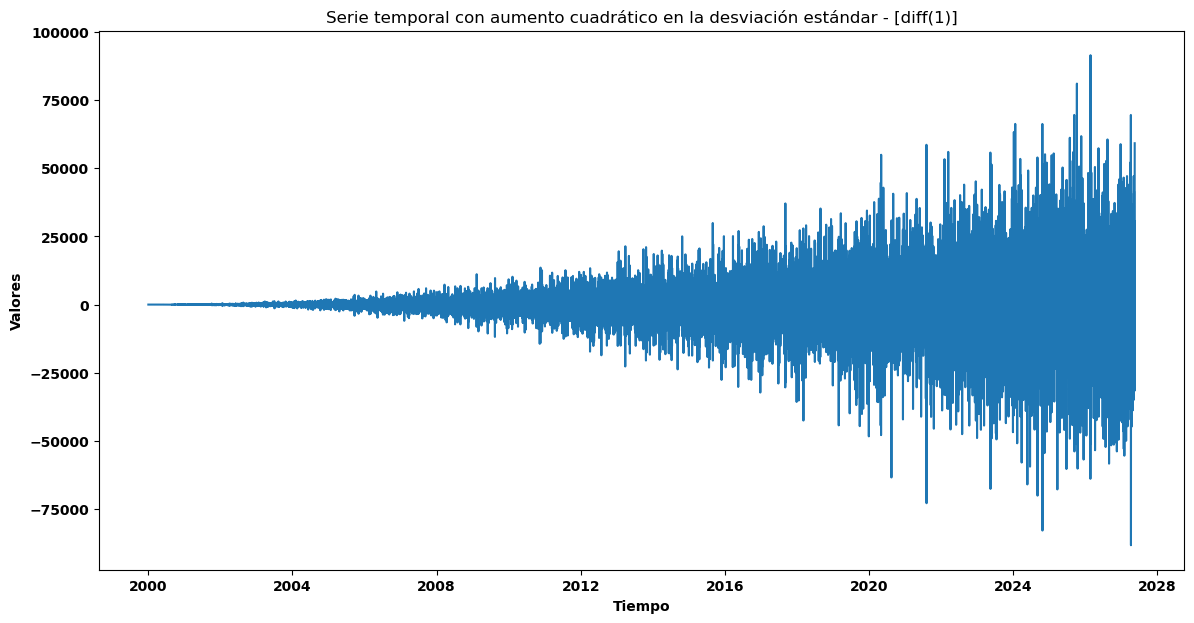

In [38]:
# Graficar la serie sintética diferenciada
plt.plot(df_std_creciente.diff())
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Serie temporal con aumento cuadrático en la desviación estándar - [diff(1)]')
plt.show()


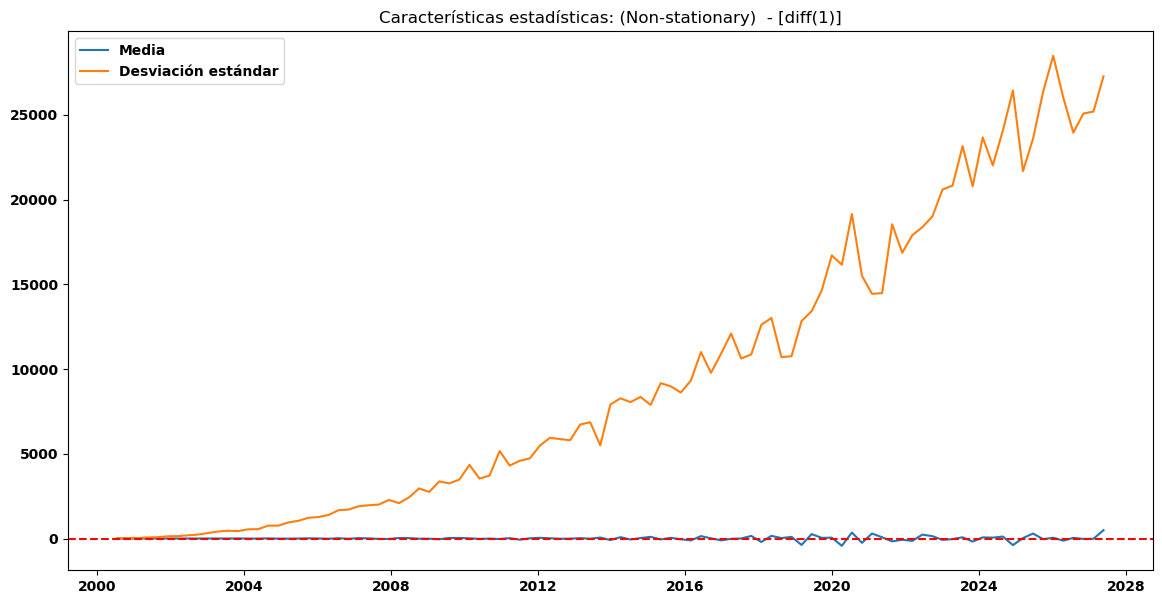

In [39]:
win = 100
df_std_creciente_media_diff = df_std_creciente.diff().rolling(win).mean().iloc[win-1::win]
df_std_creciente_std_diff = df_std_creciente.diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_std_creciente_media_diff, label='Media')
plt.plot(df_std_creciente_std_diff, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Non-stationary)  - [diff(1)]")
plt.legend()
plt.show()

Se puede ver que la diferenciación consigue de nuevo **disminuir las alteraciones en la media** de la serie, pero **no logra estabilizar la varianza**, aunque sigamos con **más ordenes de diferenciación**.

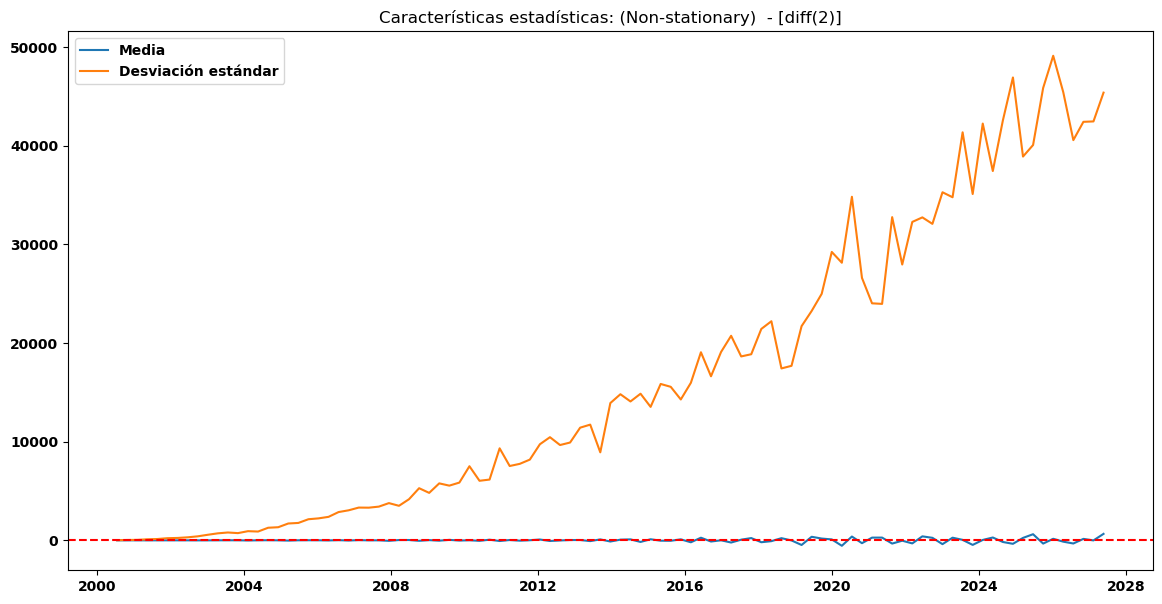

In [40]:
win = 100
df_std_creciente_media_diff2 = df_std_creciente.diff().diff().rolling(win).mean().iloc[win-1::win]
df_std_creciente_std_diff2 = df_std_creciente.diff().diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_std_creciente_media_diff2, label='Media')
plt.plot(df_std_creciente_std_diff2, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Non-stationary)  - [diff(2)]")
plt.legend()
plt.show()

### Variable transformations

La transformación de variables consiste en reemplazar los valores originales de las variables con una función de esa variable. Las transformaciones con funciones matemáticas ayudan a **reducir el sesgo** y también **mejorar la distribución** de los valores.

Hay varias transformaciones que se pueden aplicar a los datos de series temporales para **estabilizar la varianza**. Estas transformaciones se conocen comúnmente como transformaciones estabilizadoras de varianza (___variance stabilizing transformations___) que intentan llevar la distribución de la variable a una forma más simétrica, o en otras palabras, a una forma parecida a la de *Gaussiana* como:

- **Transformación logarítmica**: Consiste en **tomar el logaritmo natural de los valores** de la serie temporal. Es útil cuando la varianza de la serie temporal aumenta con el nivel de la serie.

- **Transformación de raíz cuadrada** (_square root_): esto implica **sacar la raíz cuadrada de los valores** en la serie de tiempo. Es útil también cuando la varianza de la serie temporal aumenta con el nivel de la serie.

- **Transformación de Box-Cox**: Esta es **una familia de transformaciones de potencia** que incluye las transformaciones logarítmicas y de raíz cuadrada como casos especiales. La transformación de Box-Cox se puede utilizar para encontrar el mejor parámetro de transformación (_lambda_) que estabilice la varianza de la serie temporal.

- **Transformación Yeo-Johnson**: La transformación de Yeo-Johnson fue introducida en **2000** por Yeo and Johnson como **una extensión de la transformación de _Box-Cox_**. Mientras que la transformación de **Box-Cox requiere que los datos sean positivos**, la transformación de **Yeo-Johnson puede manejar tanto datos positivos como negativos**.

### Airline Passenger Dataset

Importamos los datos del ejemplo disponible en la librería ___seaborn___ que contiene el número total de pasajeros aéreos de forma mensual.

In [41]:
import seaborn as sns
import pandas as pd

# Cargar el dataset de "flights" 
df_air = sns.load_dataset('flights')
df_air

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [42]:
# Crear una nueva columna con la unificación de otras dos
df_air['year_month'] = df_air.apply(lambda x: str(x['year']) + '-' + x['month'], axis=1)

# Convertir la columna en fechas tipo DatetimeIndex
df_air['fechas'] = pd.to_datetime(df_air['year_month'], format='%Y-%b')

# Convertir la columna de fechas a los índices del DataFrame e indicar que los datos son "mensuales"
df_air.set_index('fechas', inplace=True)
df_air.index.freq = 'MS'

# Quitar las columnas no necesarias
df_air.drop(columns=['year', 'month', 'year_month'], inplace=True)

df_air

,passengers
fechas,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Vamos a aplicar este último método para transformar la serie temporal de pasageros aéreos que vimos al principio:

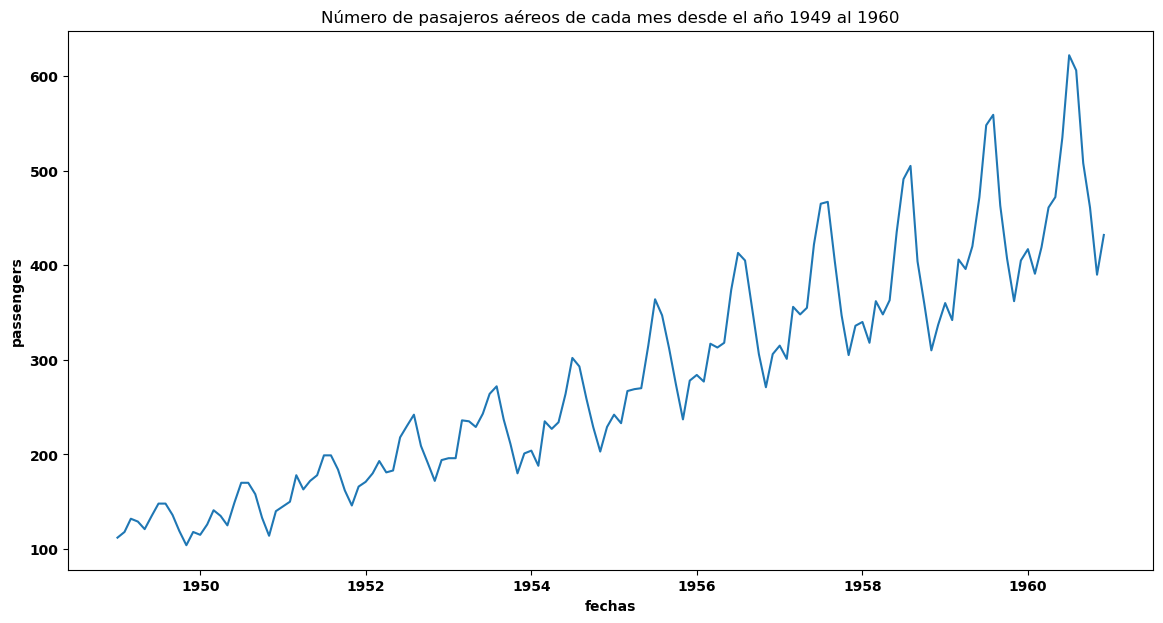

In [43]:
# Visualizamos la serie de ejemplo
sns.lineplot(data=df_air, x=df_air.index, y=df_air['passengers'])
plt.title("Número de pasajeros aéreos de cada mes desde el año 1949 al 1960")
plt.show()

Dibujamos la evolución de los atributos estadísticos:

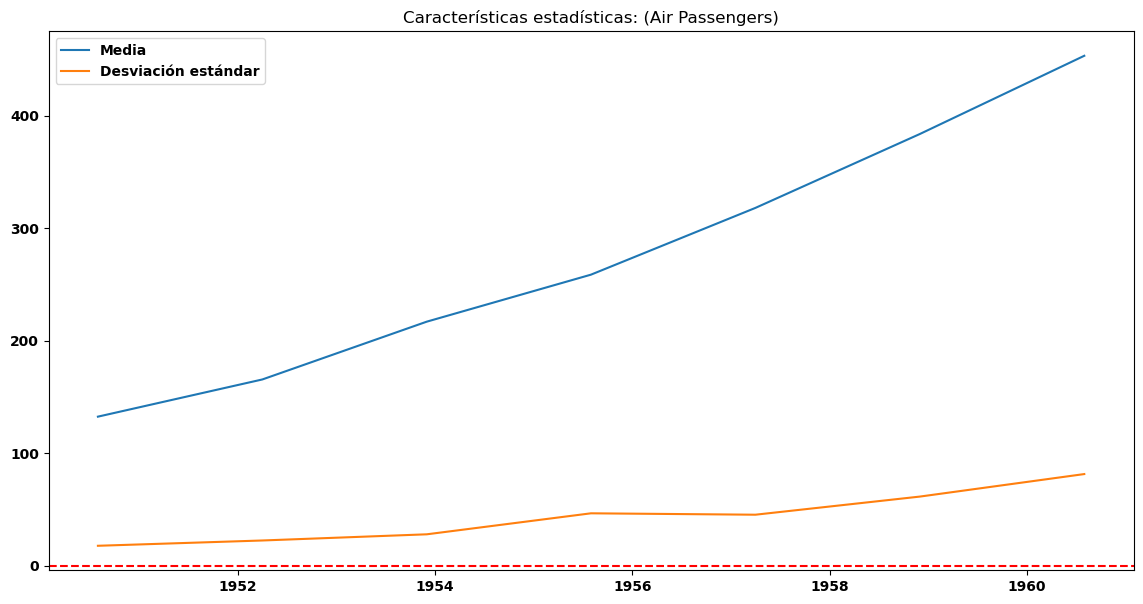

In [44]:
win = 20
df_air_media = df_air.rolling(win).mean().iloc[win-1::win]
df_air_std = df_air.rolling(win).std().iloc[win-1::win]
plt.plot(df_air_media, label='Media')
plt.plot(df_air_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Air Passengers)")
plt.legend()
plt.show()

Se puede apreciar una tendencia creciente tanto en la media como en la varianza de los valores de la serie temporal. Procedemos a realizar la diferenciación del primer grado: 

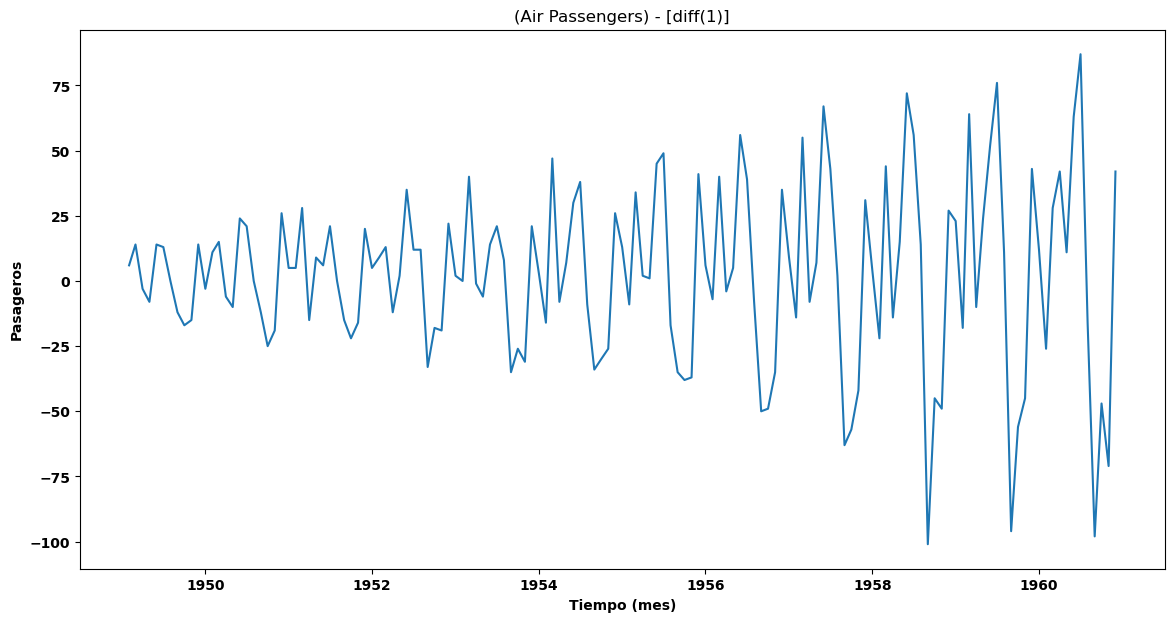

In [45]:
# Graficar la señal diferenciada
plt.plot(df_air.diff())
plt.xlabel('Tiempo (mes)')
plt.ylabel('Pasageros')
plt.title('(Air Passengers) - [diff(1)]')
plt.show()

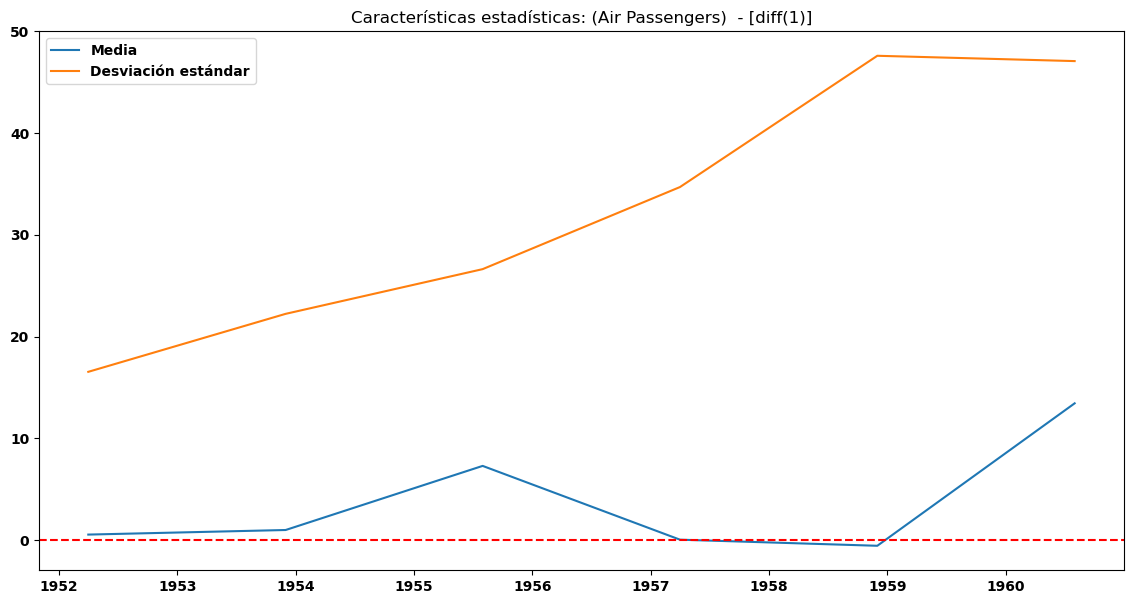

In [46]:
win = 20
df_air_media_diff = df_air.diff().rolling(win).mean().iloc[win-1::win]
df_air_std_diff = df_air.diff().rolling(win).std().iloc[win-1::win]
plt.plot(df_air_media_diff, label='Media')
plt.plot(df_air_std_diff, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Air Passengers)  - [diff(1)]")
plt.legend()
plt.show()

Conseguimos estabilizar de alguna manera la media pero la varianza sigue creciendo a lo largo del eje de tiempo. Para lograr el mismo efecto sobre la variabilidad de los datos, aplicamos una transformada de tipo **`Box-Cox`** por disponer de valores positivos. 

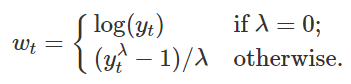

Esta transformación introduce un parámetro de transformación, llamado ***λ***, que determina el tipo de transformación aplicada. Sin embargo, elegir **el valor óptimo para _λ_** puede ser un desafío y generalmente se realiza mediante métodos de optimización.

El módulo `scipy.stats.boxcox` proporciona una implementación de la transformación *Box-Cox*, así como una función para encontrar el valor óptimo de _λ_. Esta función utiliza el método de máxima verosimilitud (___maximum likelihood___) para estimar un valor de 
_λ_ que haga que **los datos transformados sean lo más similares posible a una distribución normal**.


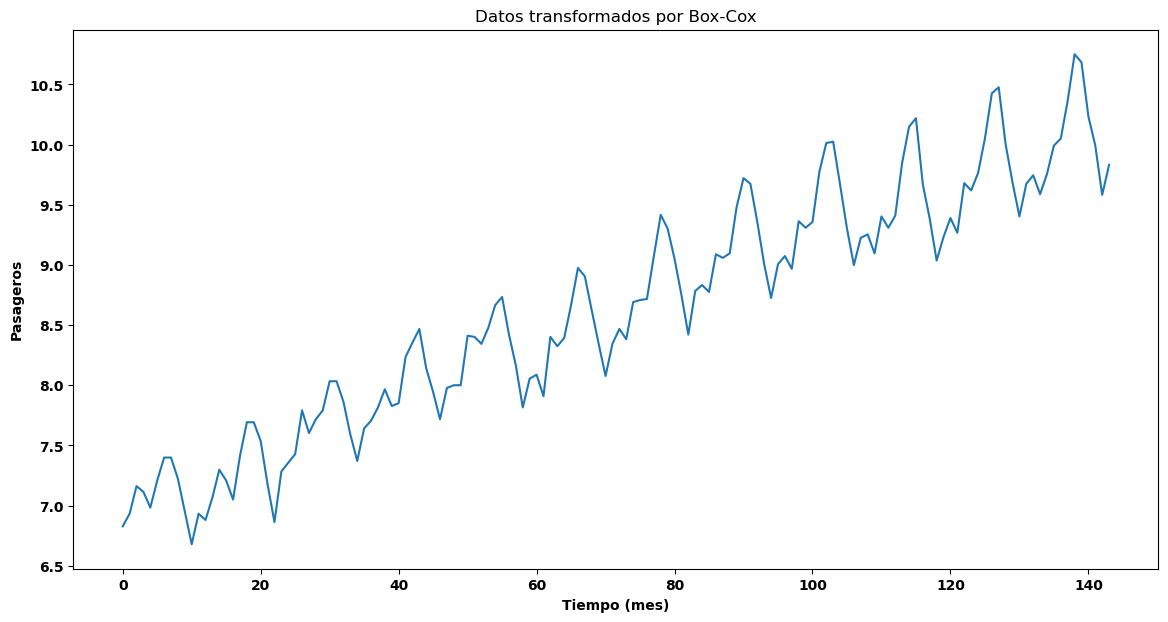

0.14802265137037945


In [47]:
from scipy.stats import boxcox

# Aplicar la transformación 
data_air_bc, lambda_air = boxcox(df_air.values.reshape(-1))

# Graficar los datos transformados
plt.plot(data_air_bc)
plt.title("Datos transformados por Box-Cox")
plt.xlabel("Tiempo (mes)")
plt.ylabel("Pasageros")
plt.show()

print(lambda_air)


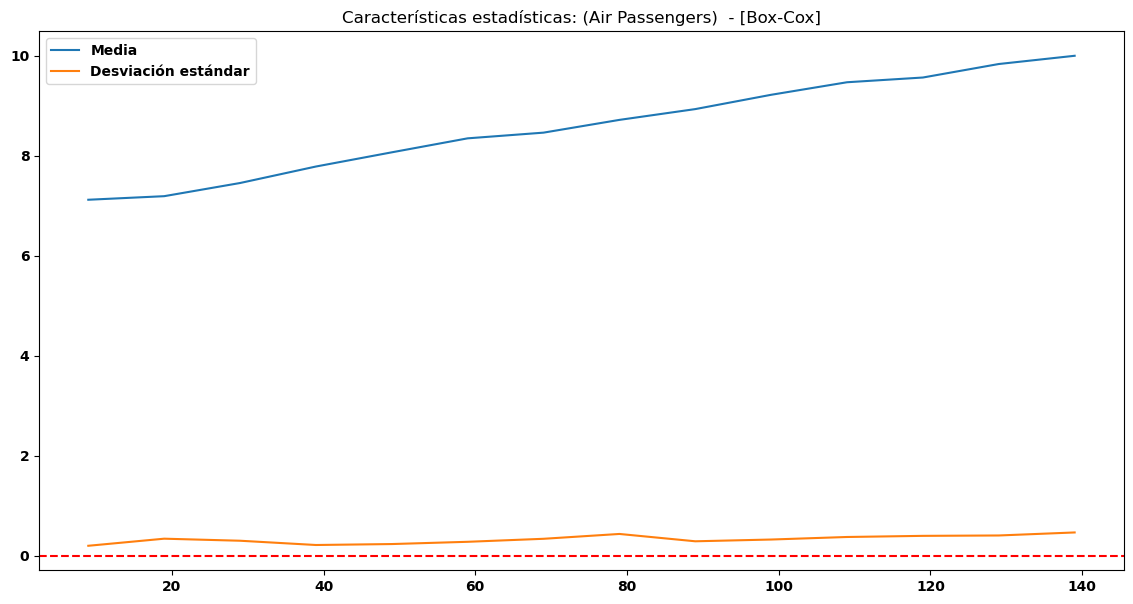

In [48]:
win = 10
df_air_bc_media = pd.DataFrame(data_air_bc).rolling(win).mean().iloc[win-1::win]
df_air_bc_std = pd.DataFrame(data_air_bc).rolling(win).std().iloc[win-1::win]
plt.plot(df_air_bc_media, label='Media')
plt.plot(df_air_bc_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Air Passengers)  - [Box-Cox]")
plt.legend()
plt.show()

Se puede apreciar de que los datos transformados tienen una varianza más estable a lo largo del eje de tiempo.

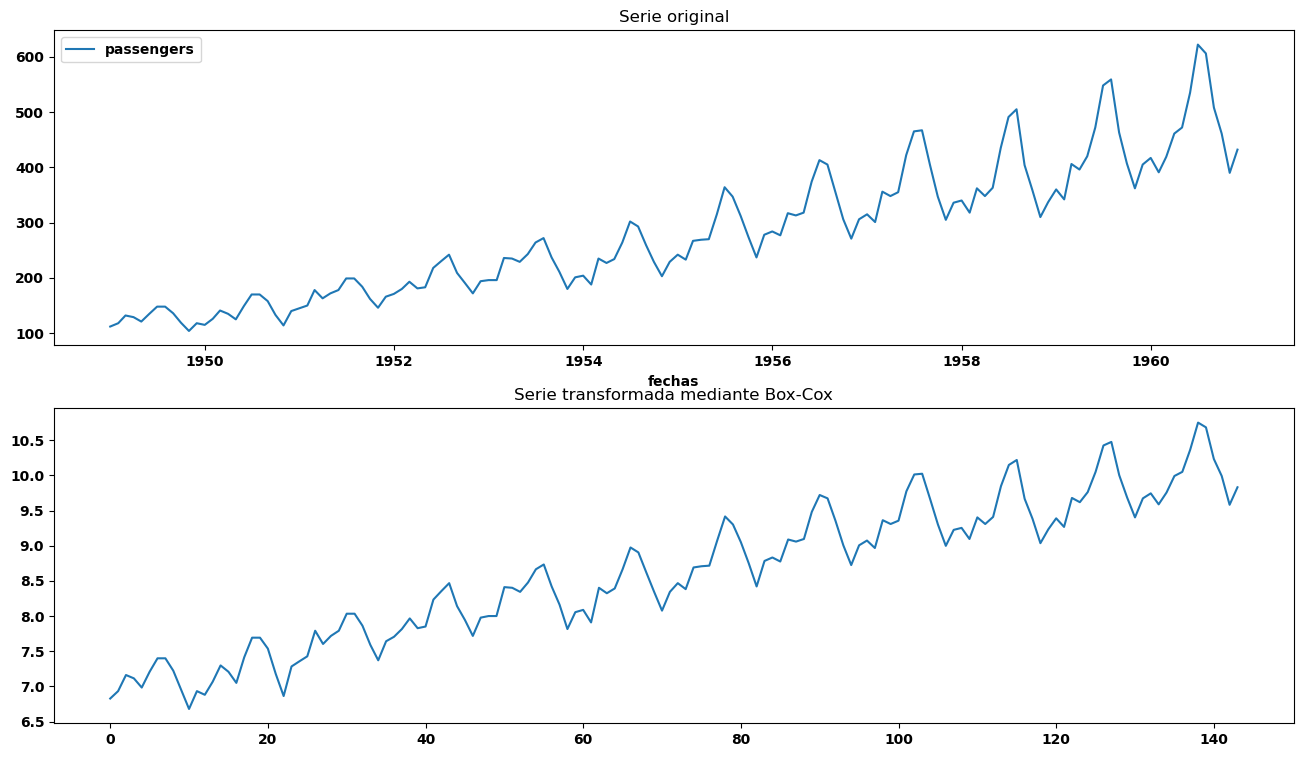

In [49]:
# Comparación visual
fig, axes = plt.subplots(2,1, figsize=(16,9))
sns.lineplot(data=df_air, ax=axes[0])
axes[0].set_title('Serie original')
sns.lineplot(data=data_air_bc, ax=axes[1])
axes[1].set_title('Serie transformada mediante Box-Cox')
plt.show()

Podemos usar la función `inv_boxcox` para realizar un **cálculo inverso** y volver a tener los **valores originales**.

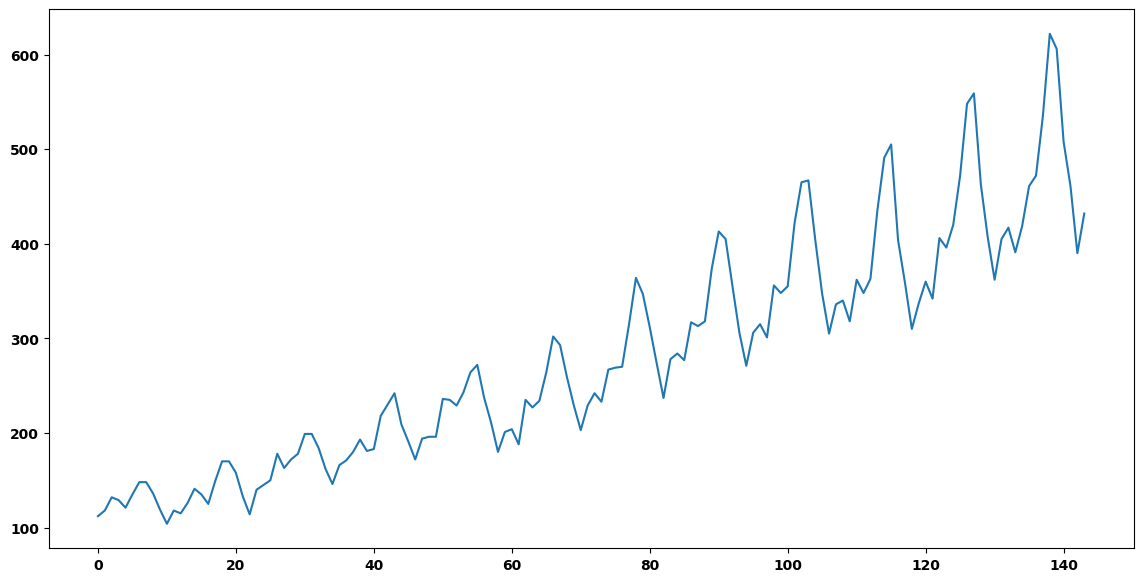

In [50]:
from scipy.special import inv_boxcox
data_bc_inv = inv_boxcox(data_air_bc, lambda_air)

plt.plot(data_bc_inv)
plt.show()


---

### **`Ejercicio 25.1`**

Vamos a nalizar los datos de **`Sunspots Dataset`** que son números promediados mensuales de **manchas solares desde 1749 hasta 1983**. Esta serie tempòral se ha recolectado en el _Observatorio Federal Suizo_ (_**Zúrich**_) hasta **1960**, luego en el _Observatorio Astronómico de Japón_ (**_Tokio_**).  

Los números de manchas solares son una *medida de la actividad solar*. Los datos vienen en las unidades originales utilizadas por los observadores de forma bruta y **no hay ajustes** por cambios en la instrumentación o sesgo del observador.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df_spot = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', index_col=False)
df_spot


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [52]:
# Convertir la columna en fechas tipo DatetimeIndex
df_spot['fechas'] = pd.to_datetime(df_spot['Month'], format='%Y-%m')

# Convertir la columna de fechas a los índices del DataFrame
df_spot.set_index('fechas', inplace=True)

# Quitar las columnas que ya no se usan
df_spot.drop(columns='Month', inplace=True)

df_spot

,Sunspots
fechas,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


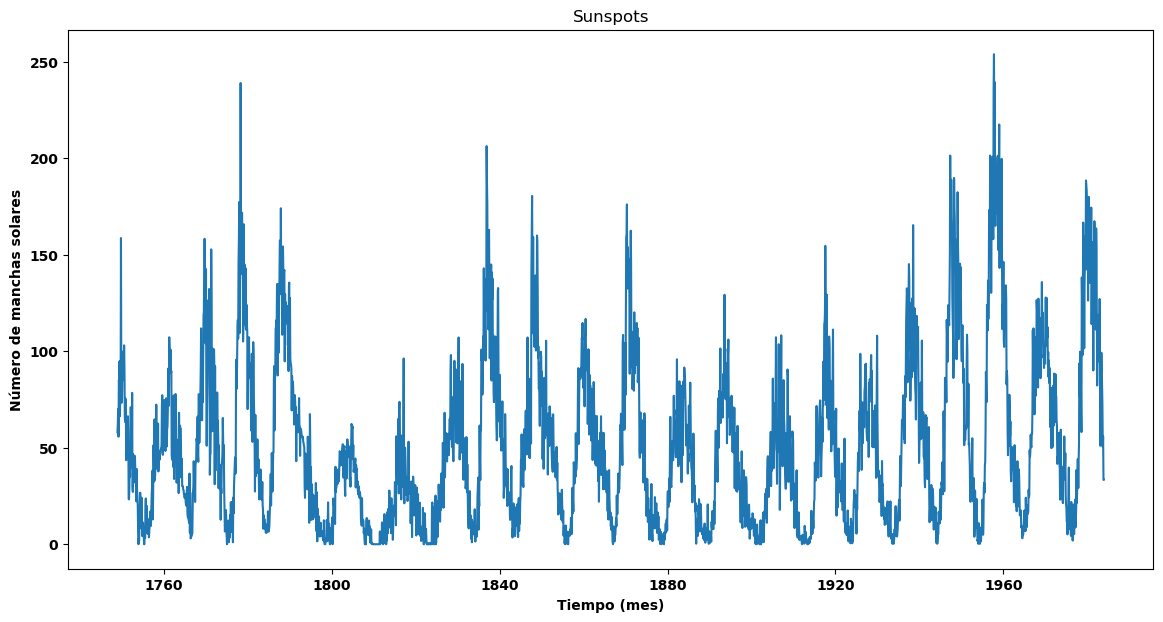

In [53]:
plt.plot(df_spot)
plt.xlabel('Tiempo (mes)')
plt.ylabel('Número de manchas solares')
plt.title('Sunspots')
plt.show()

Se puede observar que los datos de la serie **no tienen una distribución normal** y presentan oscilaciones en sus características estadísticas indicandndo que **la serie temporal no es estacionaria**.

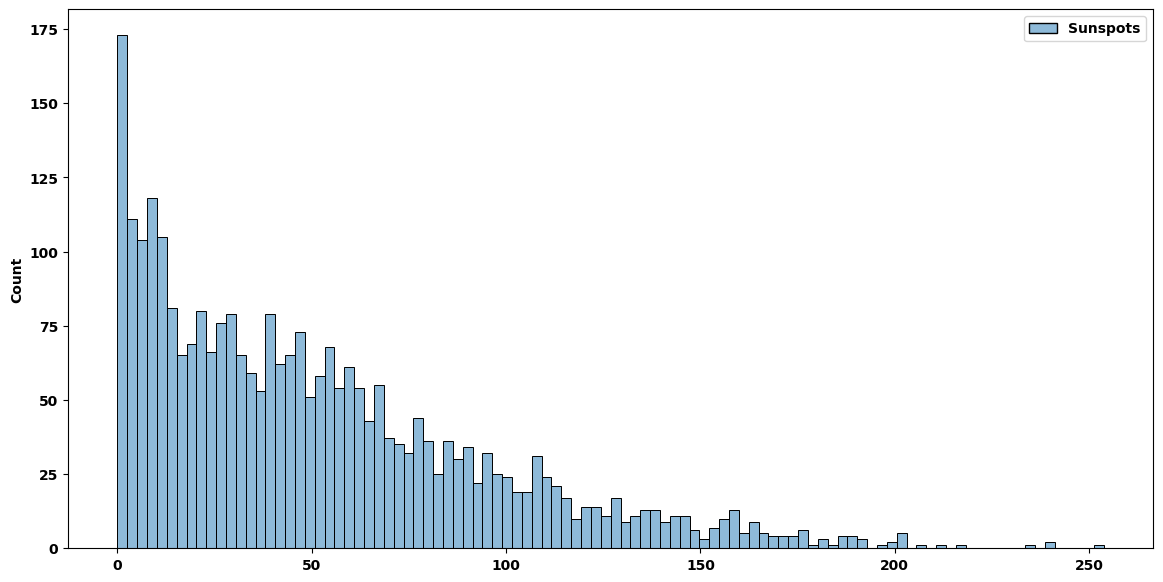

In [54]:
# Visualizamos el histograma de todos los valores de la serie
sns.histplot(data=df_spot, bins=100)
plt.show()

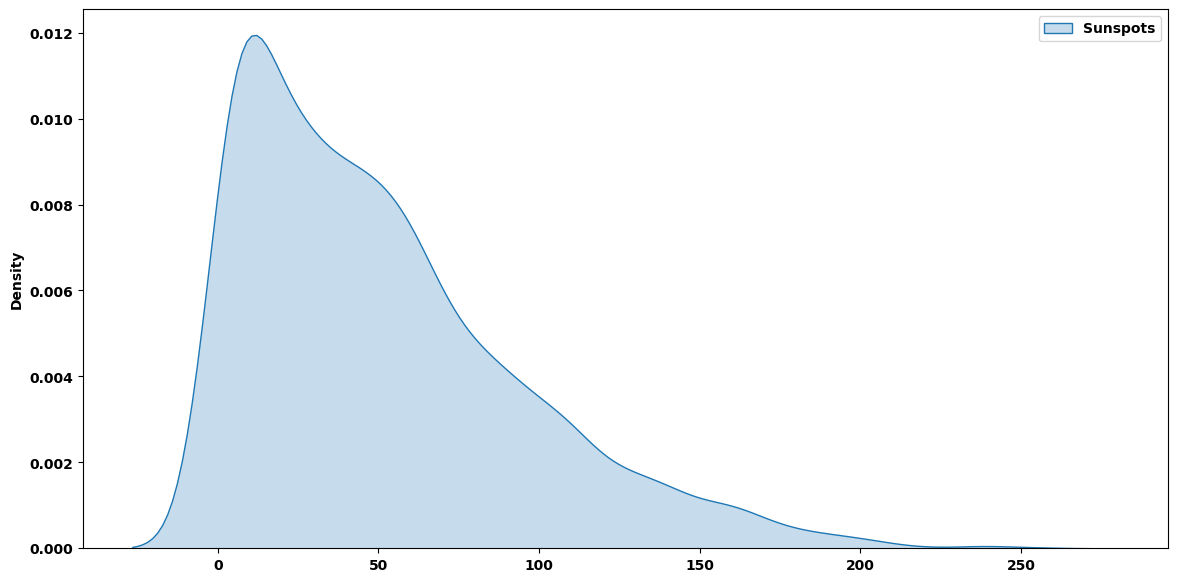

In [55]:
# Visualizamos la distribución de la probabilidad mediante el método "Kernel density estimation (KDE)"
sns.kdeplot(data=df_spot, fill=True)
plt.show()

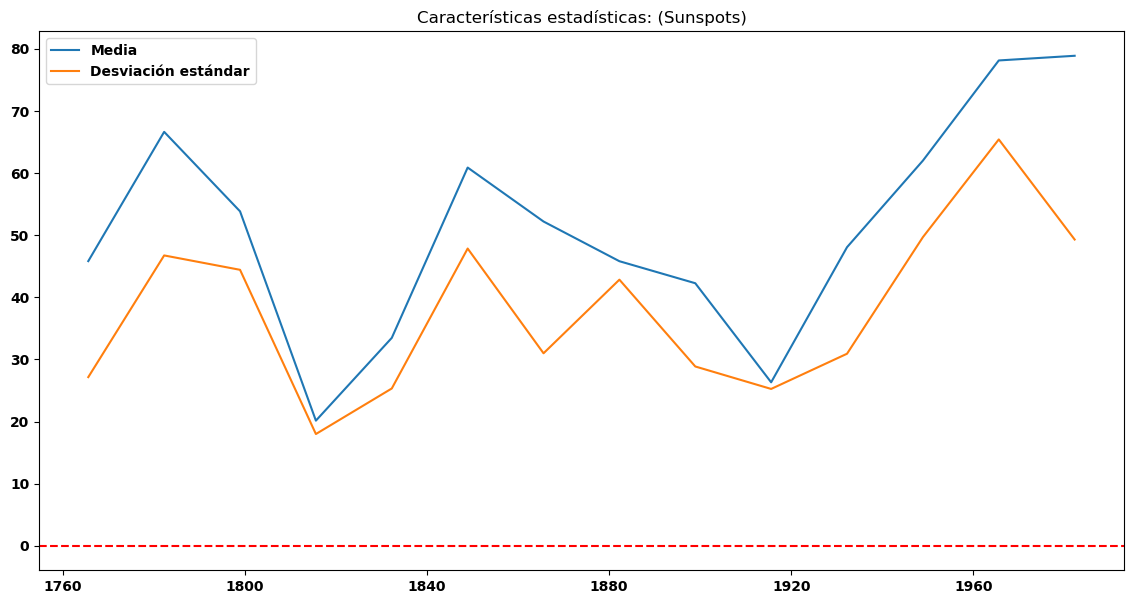

In [56]:
# La gráfica de las "Características estadísticas" y su evolución a lo largo de tiempo
win = 200
df_spot_media = df_spot.rolling(win).mean().iloc[win-1::win]
df_spot_std = df_spot.rolling(win).std().iloc[win-1::win]
plt.plot(df_spot_media, label='Media')
plt.plot(df_spot_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Sunspots)")
plt.legend()
plt.show()

**`25.1.1`** Transforma los datos de la serie temporal mediante la transformada de `Yeo-Johnson` que se aplica de una forma muy similar a la transformación `Box-Cox`. Después, visualiza los datos transformados e imprime el valor de la potencia o el hiperparámetro que se haya aplicado en la transformación (_lambda_).

In [57]:
from scipy.stats import yeojohnson
# Aplicar la transformación de Yeo-Johnson a los datos de manchas solares
data_transformed, lambda_value = yeojohnson(df_spot['Sunspots'])

In [58]:
df_spot['YJ_transformed_sunspots'] = data_transformed

In [59]:
df_spot

,Sunspots,YJ_transformed_sunspots
fechas,,
1749-01-01,58.0,9.237948
1749-02-01,62.6,9.565894
1749-03-01,70.0,10.062915
1749-04-01,55.7,9.067796
1749-05-01,85.0,10.976606
...,...,...
1983-08-01,71.8,10.178731
1983-09-01,50.3,8.650101
1983-10-01,55.8,9.075285


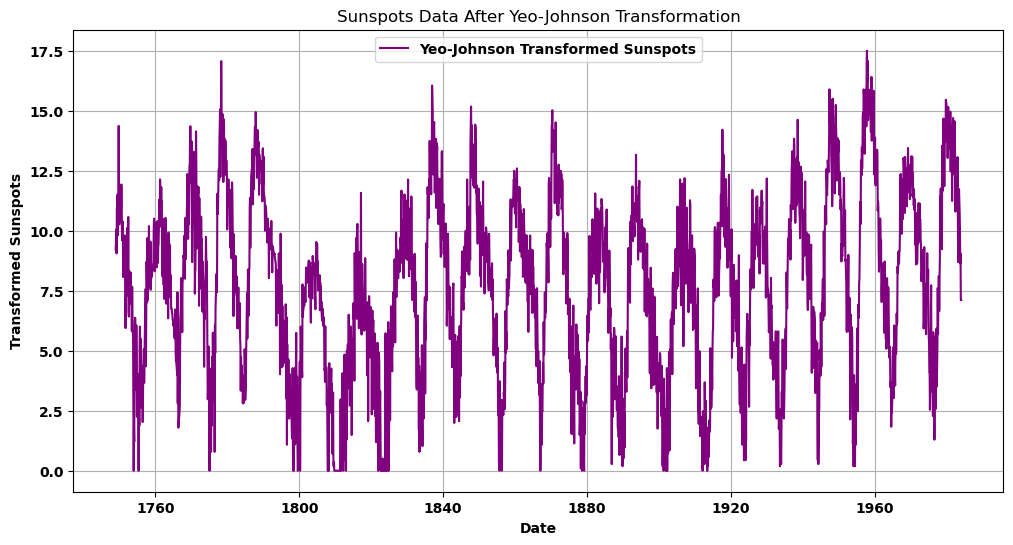

In [60]:
# Visualizar los datos transformados
plt.figure(figsize=(12, 6))
plt.plot(df_spot.index, df_spot['YJ_transformed_sunspots'], label='Yeo-Johnson Transformed Sunspots', color='purple')
plt.xlabel('Date')
plt.ylabel('Transformed Sunspots')
plt.title('Sunspots Data After Yeo-Johnson Transformation')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Imprimir el valor de lambda
print('Lambda value used in the transformation:', lambda_value)

Lambda value used in the transformation: 0.35827220693878836


**`25.1.2`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal transformada**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 200`


In [62]:
win = 200
media = pd.DataFrame(data_transformed).rolling(window=win).mean().iloc[win-1::win]
varianza = pd.DataFrame(data_transformed).rolling(window=win).std().iloc[win-1::win]

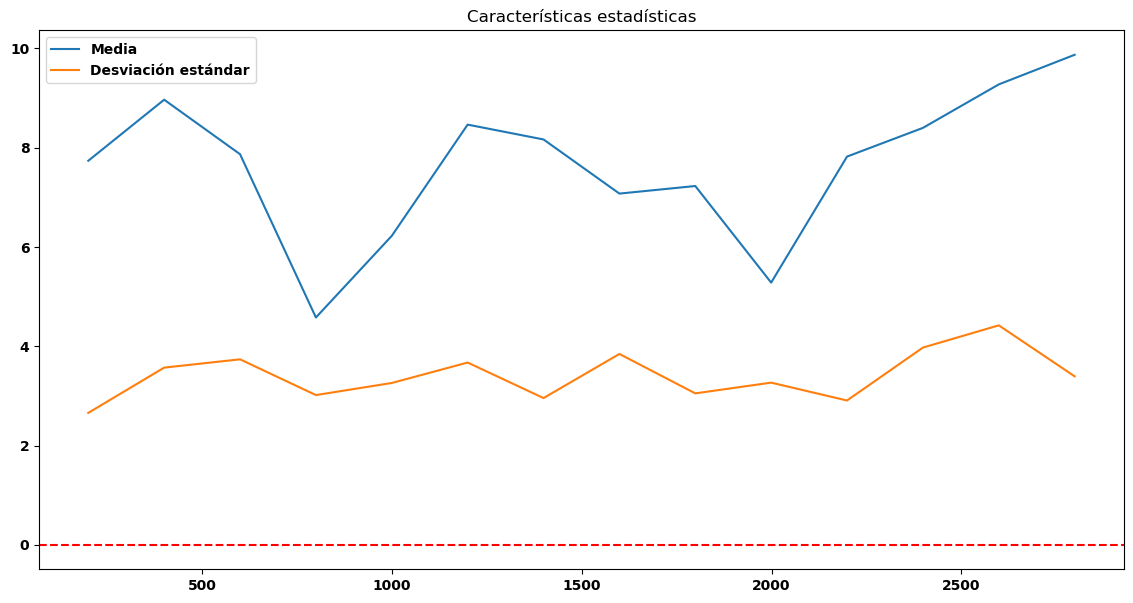

In [63]:
plt.plot(media, label='Media')
plt.plot(varianza, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas")
plt.legend()
plt.show()


Se puede ver que tanto la media como la varianza, conforme va evolucionando el tiempo, van sufriendo variaciones, siendo la varianza algo menos volátil que la media.

**`25.1.3`** Aplica una **diferenciación del primer orden** sobre estos datos transformados anteriormente. Saca la gráfica de la ***la serie temporal transformada y diferenciada***.

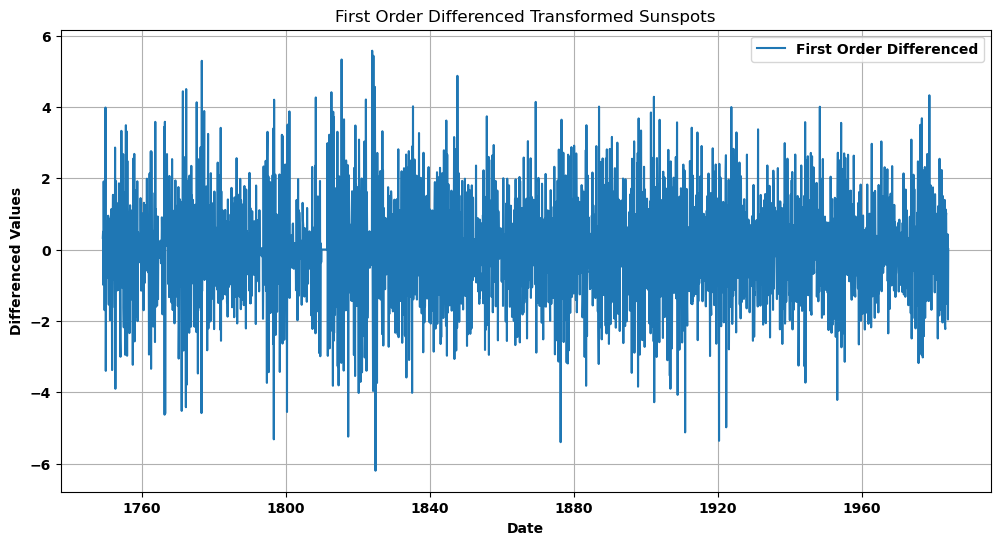

In [64]:
# Aplicamos la diferenciación de primer orden
df_spot['Differenced_Transformed'] = df_spot['YJ_transformed_sunspots'].diff()

# Visualizamos la serie temporal diferenciada
plt.figure(figsize=(12, 6))
plt.plot(df_spot.index, df_spot['Differenced_Transformed'], label='First Order Differenced')
plt.title('First Order Differenced Transformed Sunspots')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.legend()
plt.grid(True)
plt.show()


Aunque la serie diferenciada parece no tener una tendencia, parece haber una cierta periodicidad en la variabilidad de las diferencias, lo que podría estar relacionado con el ciclo solar conocido de aproximadamente 11 años, este ciclo se observaria como picos y valles en la serie de tiempo de manchas solares.

**`25.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal transformada y diferenciada**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos **comparando con los datos de la serie original**: 

 - `win = 200`
 - `plt.ylim(-1,10)`

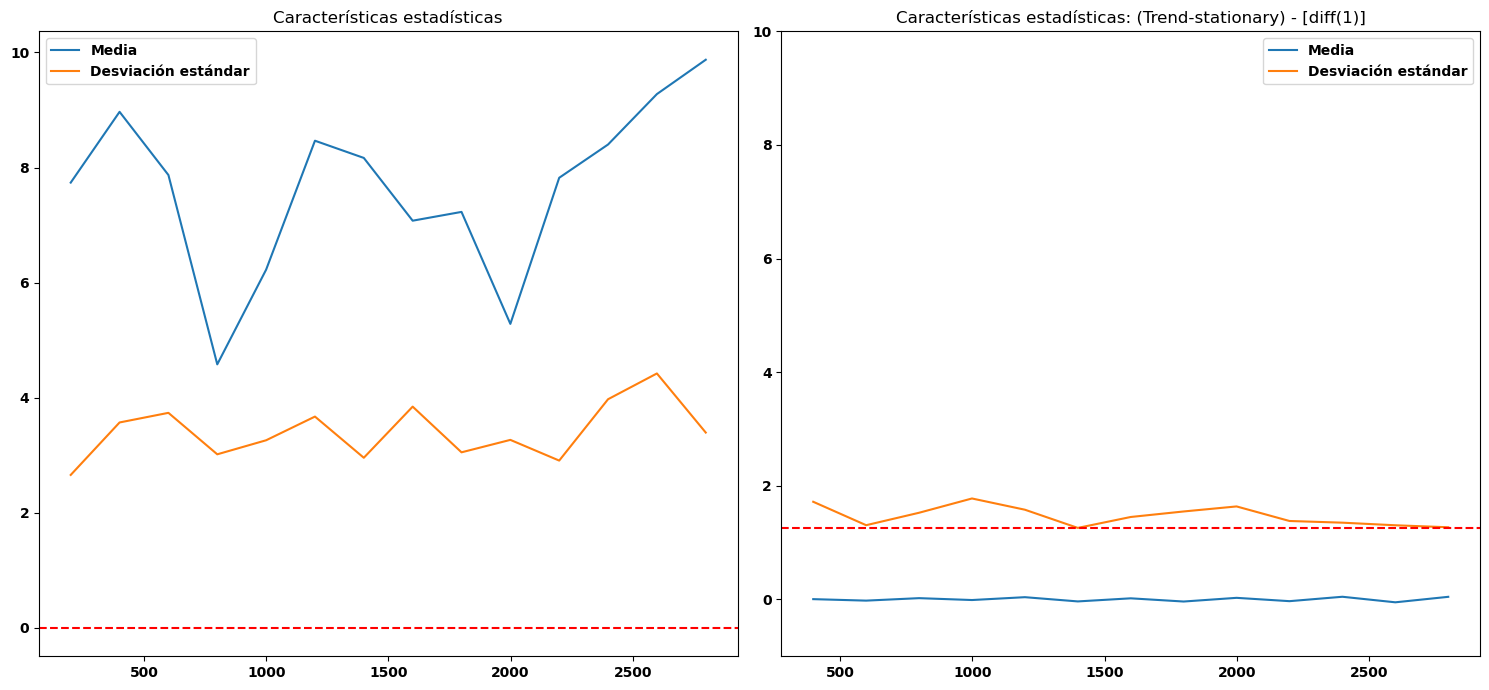

In [70]:

win = 200
media = pd.DataFrame(data_transformed).rolling(window=win).mean().iloc[win-1::win]
varianza = pd.DataFrame(data_transformed).rolling(window=win).std().iloc[win-1::win]

# Differenced Data Transformation
media_trans_dif = pd.DataFrame(data_transformed).diff().rolling(window=win).mean().iloc[win-1::win]
varianza_trans_dif = pd.DataFrame(data_transformed).diff().rolling(window=win).std().iloc[win-1::win]

# Plot both Original and Differenced Data Statistics
plt.figure(figsize=(15, 7))

# Plotting the original data statistics
plt.subplot(1, 2, 1)
plt.plot(media.index, media, label='Media')
plt.plot(varianza.index, varianza, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas")
plt.legend()

# Plotting the differenced data statistics
plt.subplot(1, 2, 2)
plt.plot(media_trans_dif.index, media_trans_dif, label='Media')
plt.plot(varianza_trans_dif.index, varianza_trans_dif, label='Desviación estándar')
plt.axhline(y=1.25, color='r', linestyle='--')
plt.ylim(-1, 10)
plt.title("Características estadísticas: (Trend-stationary) - [diff(1)]")
plt.legend()

plt.tight_layout()
plt.show()


Se puede ver que la diferenciacion ha tenido un efecto significativo, en la serie original habia una variabilidad de la media y la desviacion, en la serie transformada podemos ver una consistencia muchoa mayor.

**`25.1.5`** Saca la gráfica de ***Autocorrelación (correlograma)*** para **la serie temporal transformada y diferenciada**, considerando hasta el retraso indicado y analiza lo que ves presente en esta gráfica **comparando con los datos de la serie original**: 

 - `lags=30` 

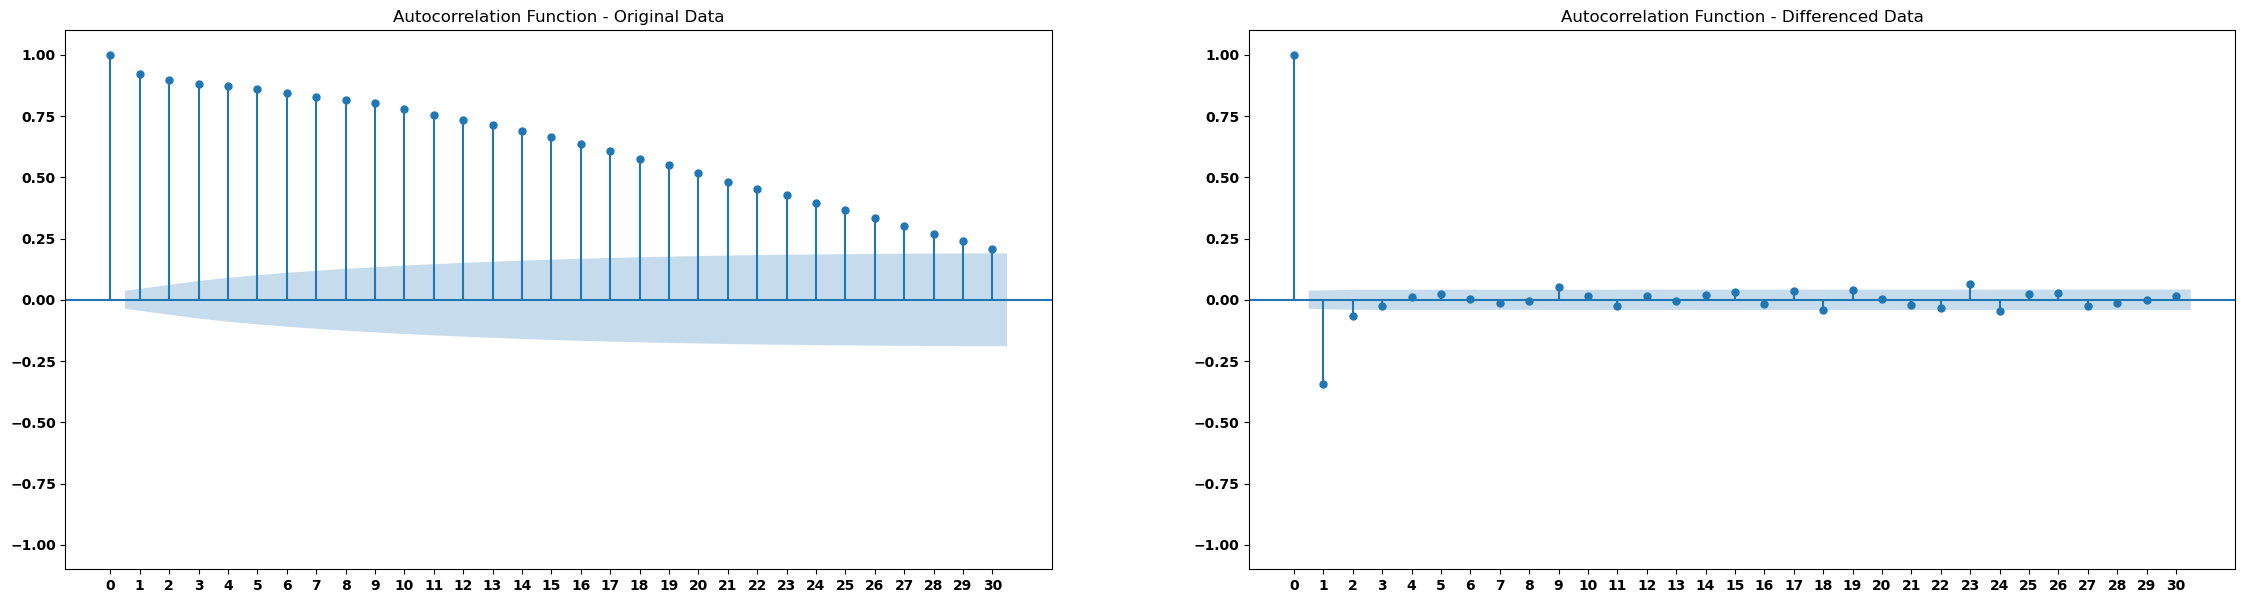

In [73]:
from statsmodels.graphics.tsaplots import plot_acf

# Simulating data transformation and differencing as before
data_transformed = pd.Series(data_transformed)
data_transformed_diff = data_transformed.diff().dropna()

# Plot ACF for original and differenced data side by side
rcParams['figure.figsize'] = 28, 7

plt.subplot(1, 2, 1)
plot_acf(data_transformed.dropna(), lags=30, ax=plt.gca())
plt.xticks(np.arange(31))
plt.ylim(-1.1, 1.1)
plt.title('Autocorrelation Function - Original Data')

plt.subplot(1, 2, 2)
plot_acf(data_transformed_diff, lags=30, ax=plt.gca())
plt.xticks(np.arange(31))
plt.ylim(-1.1, 1.1)
plt.title('Autocorrelation Function - Differenced Data')

plt.show()


Comprando las dos gráficas, podemos ver que la utilidad de la diferenciacion como tecnica para convertir una serie no estacionaria en estacionaria.

**`25.1.6`** Saca la gráfica de ***histograma*** y también la ditribución de la probabilidad usando la gráfica de ***densidad de kernel (KDE)*** para **la serie temporal transformada y diferenciada**, y analiza lo que ves presente en estas gráficas **comparando con los datos de la serie original**:
 
 - para _histplot_: `bins=100`
 - para _kdeplot_: `fill=True`

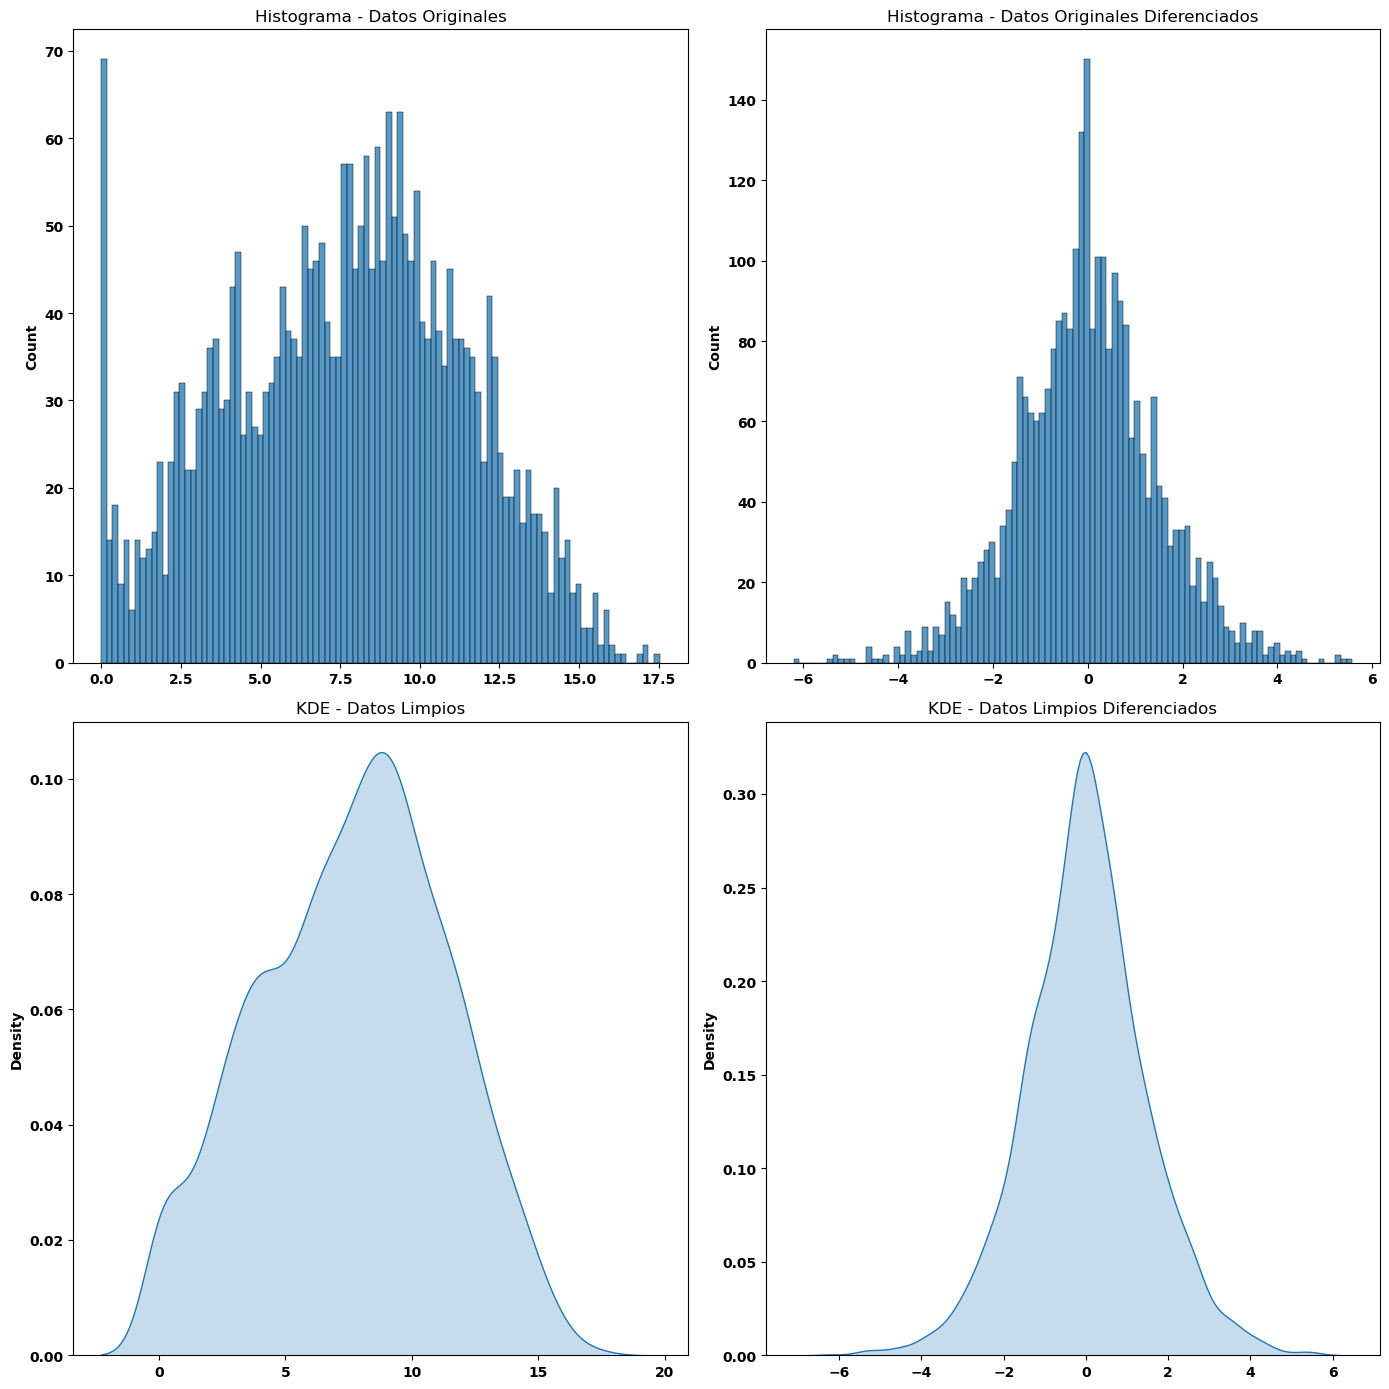

In [80]:
data_transformed = pd.Series(data_transformed)
data_transformed_diff = data_transformed.diff().dropna()

plt.figure(figsize=(14, 14))

# Plot histogram and KDE for the original data
plt.subplot(2, 2, 1)
sns.histplot(data_transformed, bins=100)
plt.title('Histograma - Datos Originales')

# Plot histogram and KDE for the differenced original data
plt.subplot(2, 2, 2)
sns.histplot(data_transformed_diff, bins=100)
plt.title('Histograma - Datos Originales Diferenciados')

# Plot histogram and KDE for the cleaned original data
plt.subplot(2, 2, 3)
sns.kdeplot(data_transformed, fill=True)
plt.title('KDE - Datos Limpios')

# Plot histogram and KDE for the cleaned differenced data
plt.subplot(2, 2, 4)
sns.kdeplot(data_transformed_diff, fill=True)
plt.title('KDE - Datos Limpios Diferenciados')

# Show the plots
plt.tight_layout()
plt.show()


La transformacion parece haber "normalizado" la distribución, haciondala mas simetrica y centrada, lo que implicaque los datos originales pueden haber incluido una tendencia que se ha eliminado al diferenciar, dando lugar a una serie estacionaria en la que la media y la varianza son constantes a lo largo del tiempo.

---